In [2]:
import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline

#PLOT CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

import jj_basic_fn as JJ
from hyperparams import Hyperparams as hp
from patient import patient
import prep
import plot_funcs
import modules
import pickle

#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', -1)

import warnings
warnings.filterwarnings("ignore")
n_classifier = 7

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/hp/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
label = '_90_nd'
p231 = pickle.load(open(hp.prepath_pat + '231_trained' + label + '.p', "rb" ))
p222_1 = pickle.load(open(hp.prepath_pat + '222_1_trained' + label + '.p', "rb" ))
p222_2 = pickle.load(open(hp.prepath_pat + '222_2_trained' + label + '.p', "rb" ))
p241 = pickle.load(open(hp.prepath_pat + '241_trained' + label + '.p', "rb" ))
pats = [p231, p241, p222_1, p222_2]

In [4]:
def show_pat_results(pat_id, labels, if_save = 0):
    pats = []
    for label in labels:
        pat = pickle.load(open(hp.prepath_pat + pat_id + '_trained' + label + '.p', "rb" ))
        pats.append(pat)

    for pat in pats:
        print('Patient ', pat.id)
        X_train, X_test, y_train, y_test = pat.X_train, pat.X_test, pat.y_train, pat.y_test
        JJ.scores_estimators(X_test, y_test, pat= pat, if_save = if_save)
        plot_funcs.plot_roc_all(X_test, y_test, pat =pat, if_save = if_save)
        

In [5]:
def show_results(pats, label, if_save = 0):
    for pat in pats:
        print('Patient ', pat.id)
        X_train, X_test, y_train, y_test = pat.X_train, pat.X_test, pat.y_train, pat.y_test
        JJ.scores_estimators(X_test, y_test, pat= pat, if_save = if_save)
        plot_funcs.plot_roc_all(X_test, y_test, pat =pat, if_save = if_save)
        

In [6]:

    
        
    
    
    
#     lw = 2
#     plt.figure()
#     ax = plt.subplot(111)
#     plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#     for i,classifier_int in enumerate(classifier_list):

#         y_score, accuracy, y_pred, clf_name = JJ.load_score(classifier_int, X_test, y_test, pat)
#         fpr, tpr, _ = roc_curve(y_test, y_score)
#         roc_auc = auc(fpr, tpr)        
        
#         plt.plot(fpr, tpr, color=cmap(i),
#                lw=lw, label='%s (AUC = %0.2f)' % (clf_name, roc_auc))
#         plt.xlim([0.0, 1.0])
#         plt.ylim([0.0, 1.05])
#         plt.xlabel('False Positive Rate', fontsize=hp.label_fontsize)
#         plt.ylabel('True Positive Rate', fontsize=hp.label_fontsize)
#         plt.title('Patient ' + pat.id + ': ROC for all classifiers', fontsize=hp.label_fontsize)
#     # box = ax.get_position()
#     # ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
#     # ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
#     #           shadow = True, ncol = 4, prop = {'size':10})
#     plt.legend(prop={'size': 14})
#     if if_save:
#         plt.savefig('../fig/'+ pat.id + '/' + 'roc_all' + '.png')
#     plt.show()

<Figure size 576x360 with 0 Axes>

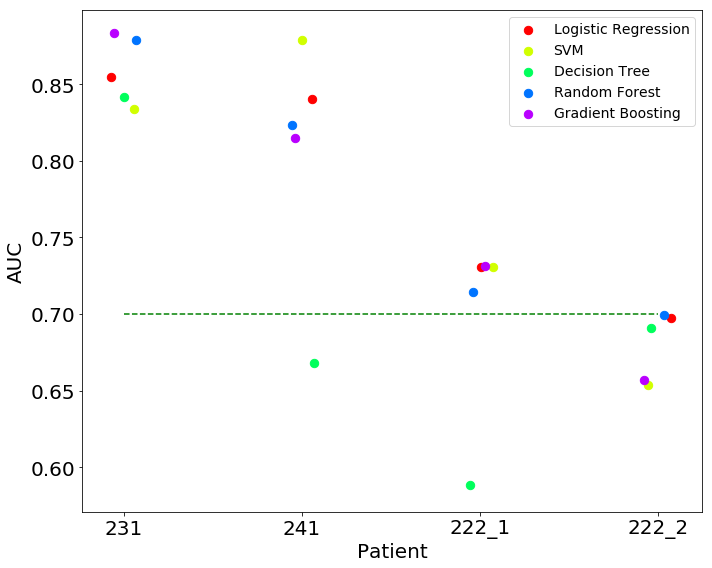

In [7]:
plot_funcs.scatter_performance_all(pats, if_save = 1)

231
good:  537
bad:  356
total:  893


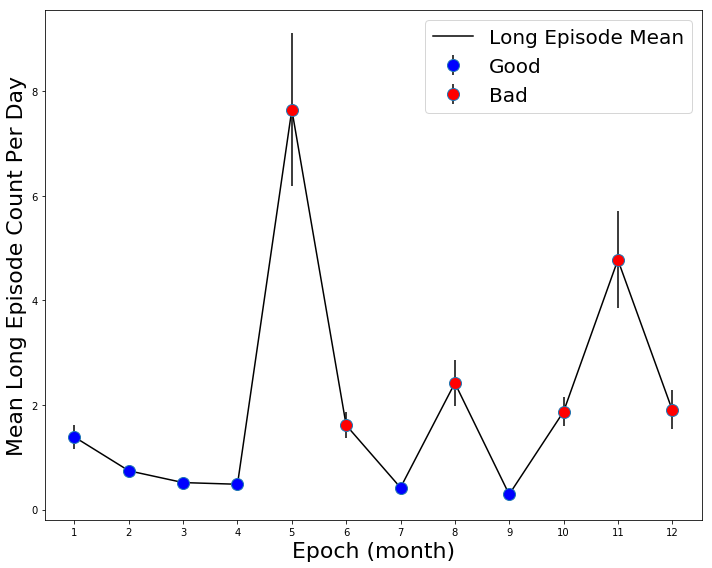

222_1
good:  276
bad:  452
total:  728


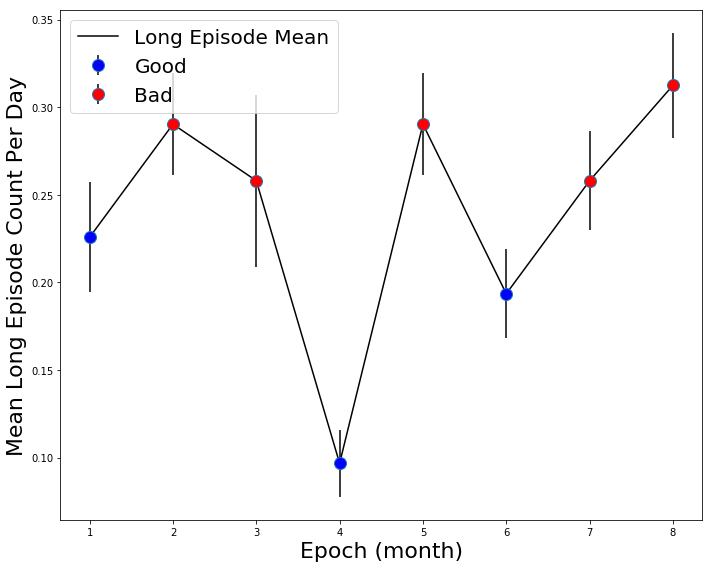

222_2
good:  265
bad:  359
total:  624


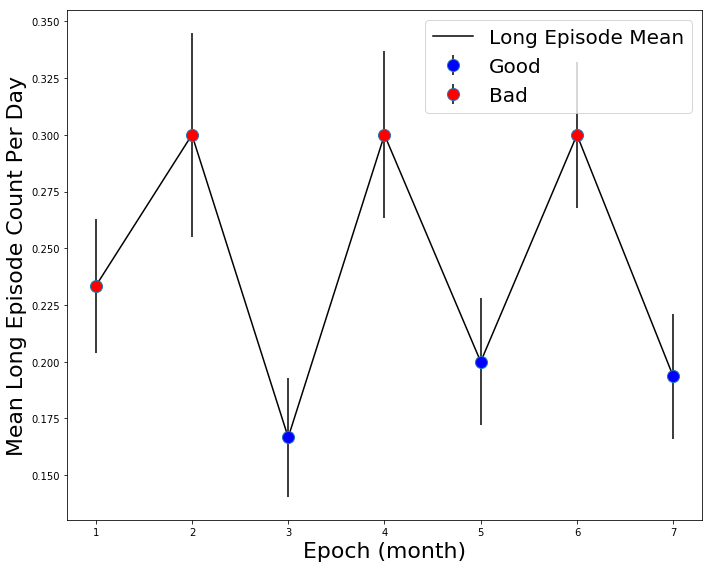

241
good:  281
bad:  288
total:  569


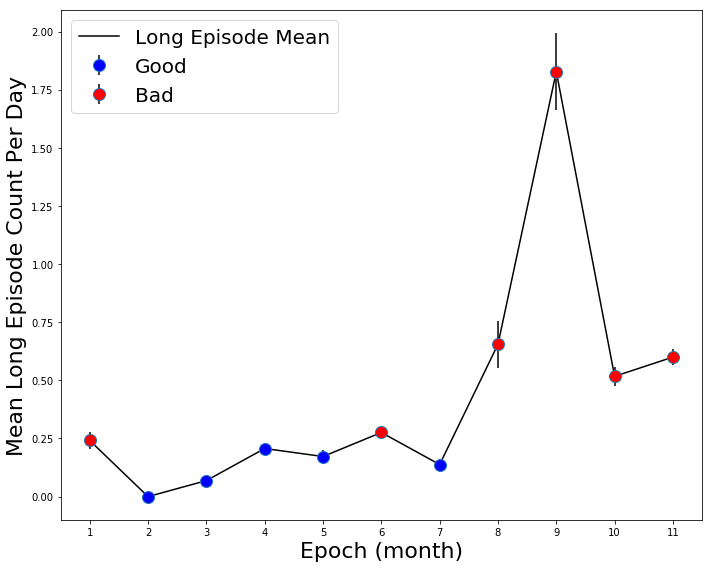

In [87]:
plot_funcs.plot_epoch_mean(pats, if_save = 1, label = '', if_title = 0)

Patient  231


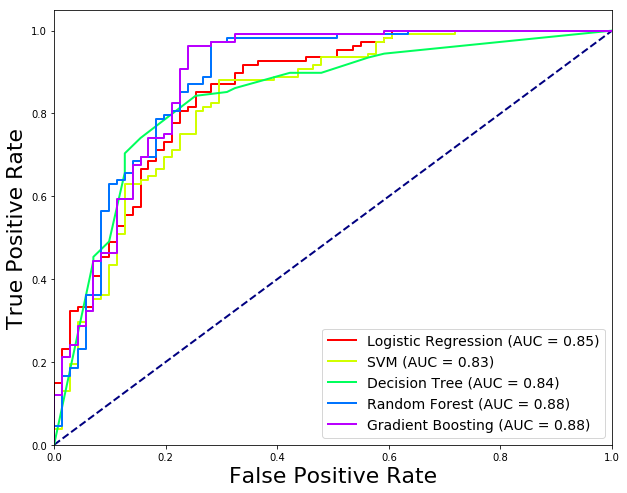

Patient  222_1


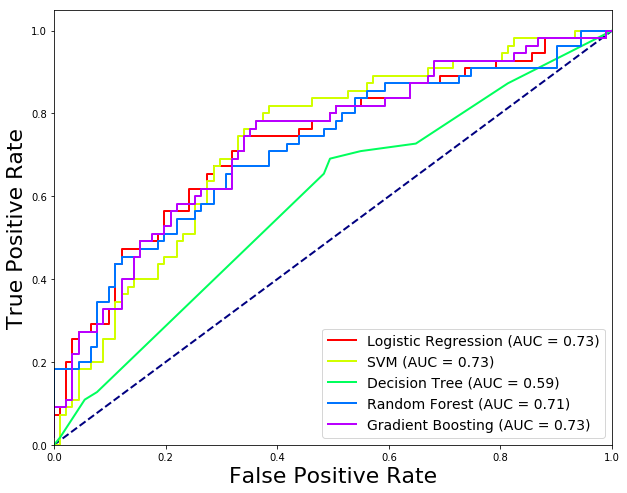

Patient  222_2


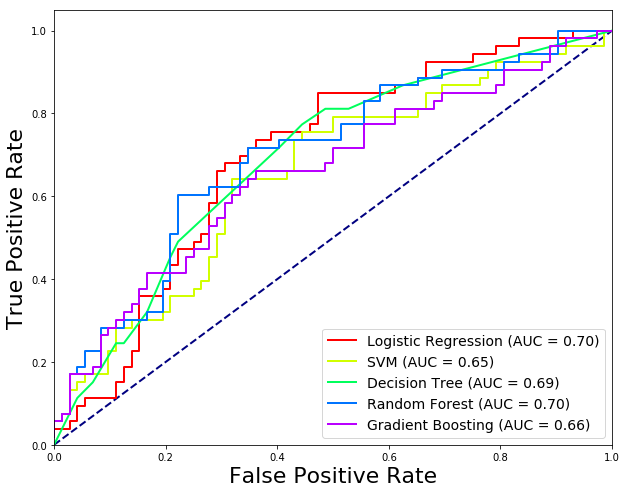

Patient  241


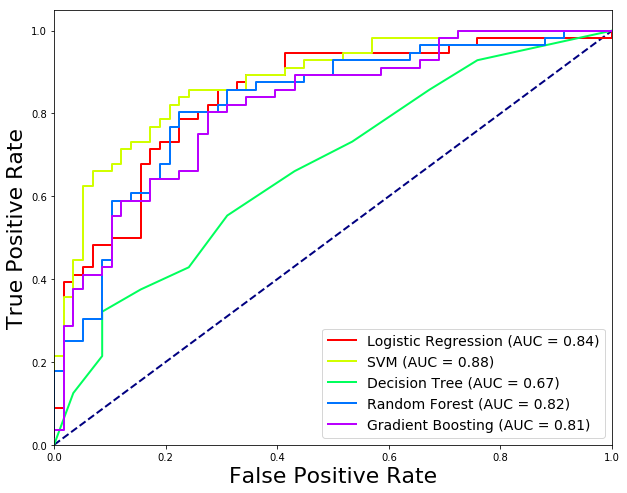

In [88]:
for pat in pats:
    print('Patient ', pat.id)
    X_train, X_test, y_train, y_test = pat.X_train, pat.X_test, pat.y_train, pat.y_test
    #JJ.scores_estimators(X_test, y_test, pat= pat, if_save = 0)
    plot_funcs.plot_roc_all(X_test, y_test, pat =pat, if_save = 1, if_title=0)

In [113]:
pat.features

filename             region_start_time  long_epi  sleep      delta1  \
647   1.313099e+17 2017-02-07 04:00:29.000016000  0.0       1.0    52.540879    
648   1.313099e+17 2017-02-07 10:00:27.000028800  0.0       0.0    67.371989    
649   1.313100e+17 2017-02-07 16:00:26.000035200  0.0       0.0    99.857643    
650   1.313103e+17 2017-02-07 22:00:13.000032000  0.0       0.0    129.677420   
651   1.313103e+17 2017-02-08 04:00:12.000038400  0.0       1.0    91.679727    
652   1.313108e+17 2017-02-08 10:00:10.999958400  0.0       0.0    116.925373   
653   1.313108e+17 2017-02-08 16:00:09.999964800  0.0       0.0    89.494190    
654   1.313117e+17 2017-02-09 15:59:54.999974400  0.0       0.0    82.446978    
655   1.313126e+17 2017-02-09 21:59:42.999964800  0.0       0.0    326.016488   
656   1.313126e+17 2017-02-10 03:59:41.999971200  0.0       1.0    72.776059    
657   1.313126e+17 2017-02-10 09:59:40.999977600  0.0       0.0    108.229481   
658   1.313126e+17 2017-02-10 15:59:38.999990400  0.0       0.0    85.071146    
659   1.313129e+17 2017-02-10 21:59:26.999980800  0.0       0.0    111.902551   
660   1.313129e+17 2017-02-11 03:59:25.999987200  0.0       1.0    201.461377   
661   1.313134e+17 2017-02-11 09:59:25.999987200  0.0       0.0    60.616129    
662   1.313134e+17 2017-02-11 15:59:24.000000000  0.0       0.0    123.753541   
663   1.313143e+17 2017-02-12 15:59:07.000022400  0.0       0.0    105.109073   
664   1.313151e+17 2017-02-13 09:58:55.000012800  0.0       0.0    94.931808    
665   1.313151e+17 2017-02-13 15:58:54.000019200  0.0       0.0    209.120596   
666   1.313160e+17 2017-02-13 21:58:41.000016000  0.0       0.0    127.633468   
667   1.313160e+17 2017-02-14 03:58:39.000028800  0.0       1.0    110.453902   
668   1.313160e+17 2017-02-14 09:58:38.000035200  0.0       0.0    118.026761   
669   1.313160e+17 2017-02-14 15:58:37.000041600  0.0       0.0    95.580090    
670   1.313178e+17 2017-02-16 09:58:08.999961600  0.0       0.0    117.004756   
671   1.313178e+17 2017-02-16 15:58:07.999968000  0.0       0.0    99.109436    
672   1.313187e+17 2017-02-16 21:57:54.999964800  0.0       0.0    453.855925   
673   1.313187e+17 2017-02-17 03:57:53.999971200  0.0       1.0    289.936093   
674   1.313187e+17 2017-02-17 09:57:51.999984000  0.0       0.0    113.337014   
675   1.313187e+17 2017-02-17 15:57:50.999990400  0.0       0.0    92.519170    
676   1.313190e+17 2017-02-17 21:57:38.999980800  0.0       0.0    307.360492   
677   1.313190e+17 2017-02-18 03:57:36.999993600  0.0       1.0    124.314776   
678   1.313195e+17 2017-02-18 09:57:37.999987200  0.0       0.0    76.204433    
679   1.313195e+17 2017-02-18 15:57:36.000000000  0.0       0.0    98.416434    
680   1.313204e+17 2017-02-18 21:57:23.999990400  0.0       0.0    390.385652   
681   1.313204e+17 2017-02-19 03:57:22.999996800  0.0       1.0    158.472801   
682   1.313204e+17 2017-02-19 09:57:22.000003200  0.0       0.0    69.980259    
683   1.313204e+17 2017-02-19 15:57:20.000015999  0.0       0.0    85.529898    
684   1.313208e+17 2017-02-19 21:57:08.000006400  0.0       0.0    314.449062   
685   1.313208e+17 2017-02-20 03:57:07.000012800  0.0       1.0    171.313947   
686   1.313212e+17 2017-02-20 09:57:06.000019200  0.0       0.0    65.611015    
687   1.313212e+17 2017-02-20 15:57:05.000025600  0.0       0.0    61.261887    
688   1.313221e+17 2017-02-20 21:56:54.000009600  0.0       0.0    227.575099   
689   1.313221e+17 2017-02-21 03:56:53.000016000  0.0       1.0    77.789087    
690   1.313221e+17 2017-02-21 09:56:52.000022400  0.0       0.0    73.630912    
691   1.313221e+17 2017-02-21 15:56:50.000035200  0.0       0.0    96.956591    
692   1.313229e+17 2017-02-21 21:56:38.000025600  0.0       0.0    188.976039   
693   1.313229e+17 2017-02-22 03:56:36.000038400  0.0       1.0    99.018581    
694   1.313229e+17 2017-02-22 09:56:35.000044800  0.0       0.0    87.488023    
695   1.313229e+17 2017-02-22 15:56:33.99

<Figure size 842.4x595.44 with 0 Axes>

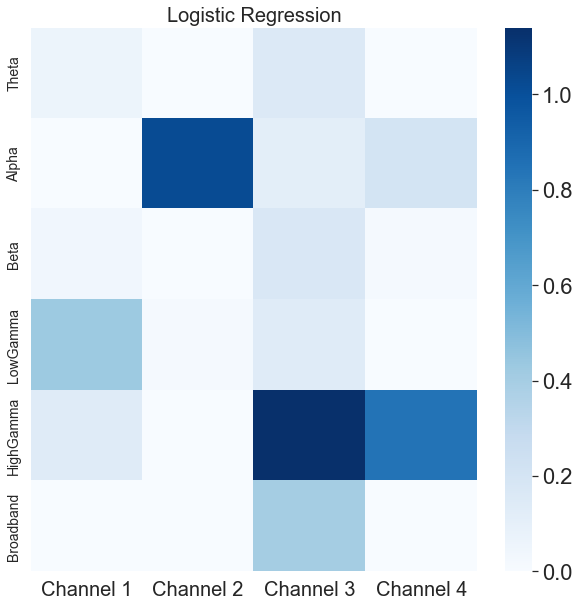

['HighGamma3', 'Alpha2']
The 3 most important features for Logistic Regression are Alpha2, HighGamma3, 
[[0.06573661 0.         0.15852955 0.        ]
 [0.         1.02042529 0.11699418 0.20623458]
 [0.04348025 0.         0.1764864  0.02016911]
 [0.42860538 0.01974284 0.14124044 0.        ]
 [0.14089606 0.         1.13978751 0.84553096]
 [0.         0.         0.40133948 0.        ]]


<Figure size 842.4x595.44 with 0 Axes>

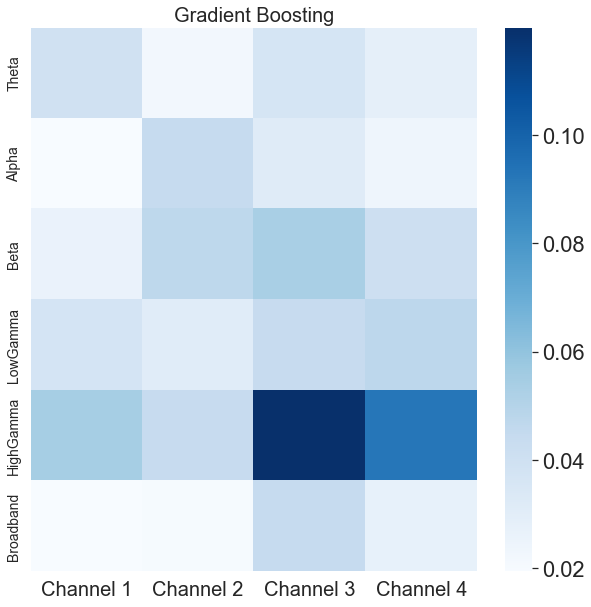

['HighGamma3', 'Alpha2']
The 3 most important features for Gradient Boosting are HighGamma4, HighGamma3, 
[[0.03951255 0.02229448 0.03692956 0.02880391]
 [0.01945859 0.04487633 0.03175523 0.0243341 ]
 [0.0264017  0.04704591 0.05390382 0.04112368]
 [0.03747988 0.03086743 0.04428144 0.04760805]
 [0.05436701 0.04431513 0.11985103 0.09254828]
 [0.01951015 0.02032043 0.04493678 0.02747451]]


<Figure size 842.4x595.44 with 0 Axes>

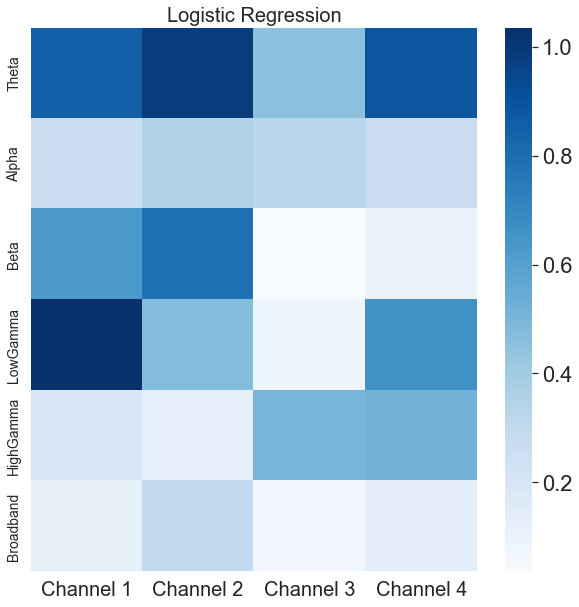

['LowGamma1', 'Theta2']
The 3 most important features for Logistic Regression are Theta2, LowGamma1, 
[[0.85107025 0.98509532 0.45442095 0.88714106]
 [0.26208981 0.35368499 0.32515388 0.26695262]
 [0.62994561 0.78897826 0.03649076 0.10555708]
 [1.03498146 0.47668319 0.08194331 0.66363966]
 [0.2029168  0.13343701 0.50202049 0.51728725]
 [0.1239647  0.30044963 0.0701549  0.1394327 ]]


<Figure size 842.4x595.44 with 0 Axes>

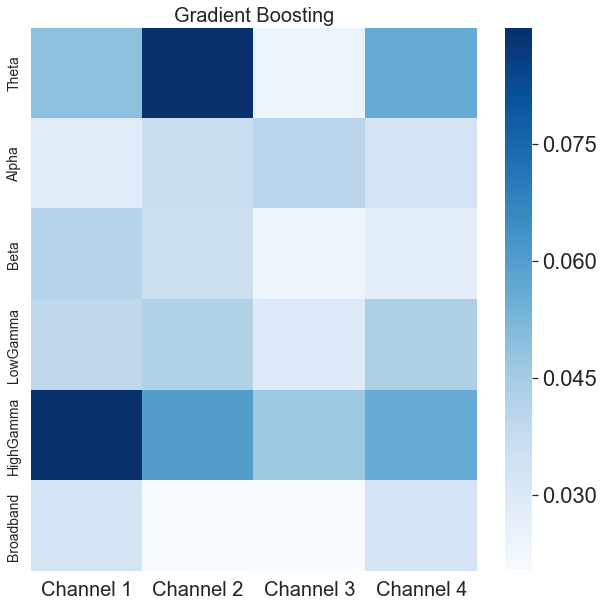

['LowGamma1', 'Theta2']
The 3 most important features for Gradient Boosting are Theta2, HighGamma1, 
[[0.04923288 0.08970373 0.02432875 0.05609423]
 [0.02841529 0.03626618 0.04091842 0.03302459]
 [0.04133485 0.03548417 0.02381569 0.02754489]
 [0.0393069  0.04202938 0.02919704 0.04317349]
 [0.08984469 0.06046708 0.04686617 0.05562515]
 [0.0334819  0.02097224 0.02021525 0.03265703]]


<Figure size 842.4x595.44 with 0 Axes>

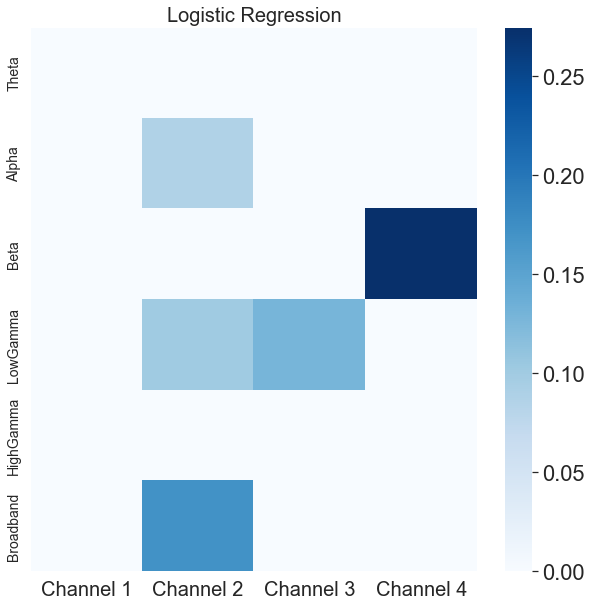

['Beta4', 'Broadband2']
The 3 most important features for Logistic Regression are Broadband2, Beta4, 
[[0.         0.         0.         0.        ]
 [0.         0.08720638 0.         0.        ]
 [0.         0.         0.         0.27455344]
 [0.         0.10101849 0.12963663 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.17130217 0.         0.        ]]


<Figure size 842.4x595.44 with 0 Axes>

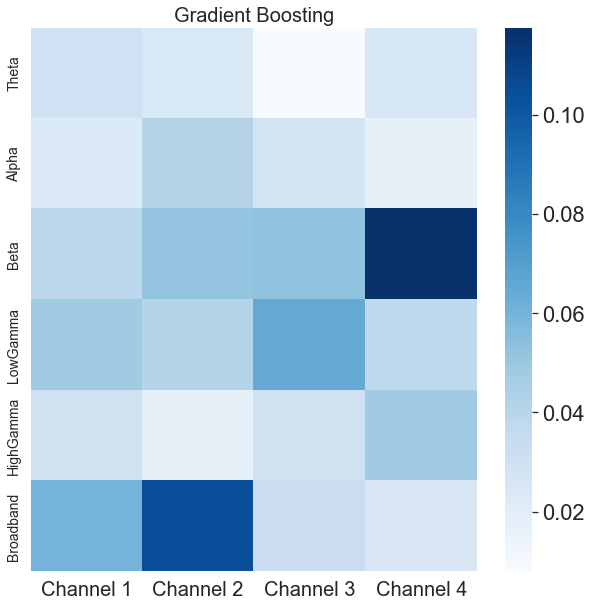

['Beta4', 'Broadband2']
The 3 most important features for Gradient Boosting are Broadband2, Beta4, 
[[0.0305 0.0245 0.008  0.0255]
 [0.023  0.0415 0.028  0.0175]
 [0.039  0.052  0.053  0.1175]
 [0.0485 0.041  0.0645 0.0375]
 [0.0295 0.0175 0.0295 0.0485]
 [0.06   0.105  0.0335 0.025 ]]


<Figure size 842.4x595.44 with 0 Axes>

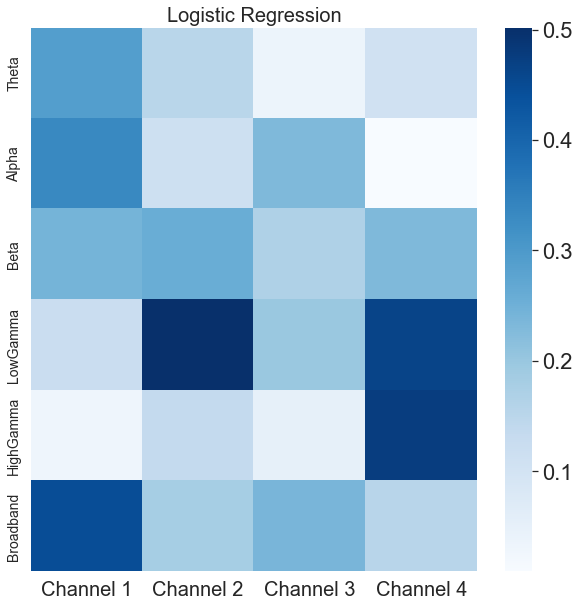

['LowGamma2', 'HighGamma4']
The 3 most important features for Logistic Regression are HighGamma4, LowGamma2, 
[[0.2912201  0.1520037  0.0373267  0.1075703 ]
 [0.33247818 0.11436609 0.23146025 0.00939546]
 [0.24272636 0.25859725 0.16791432 0.23106962]
 [0.12361912 0.5016368  0.1980347  0.46394347]
 [0.03141259 0.13613751 0.05228451 0.4761082 ]
 [0.44649583 0.18242025 0.23888941 0.15438142]]


<Figure size 842.4x595.44 with 0 Axes>

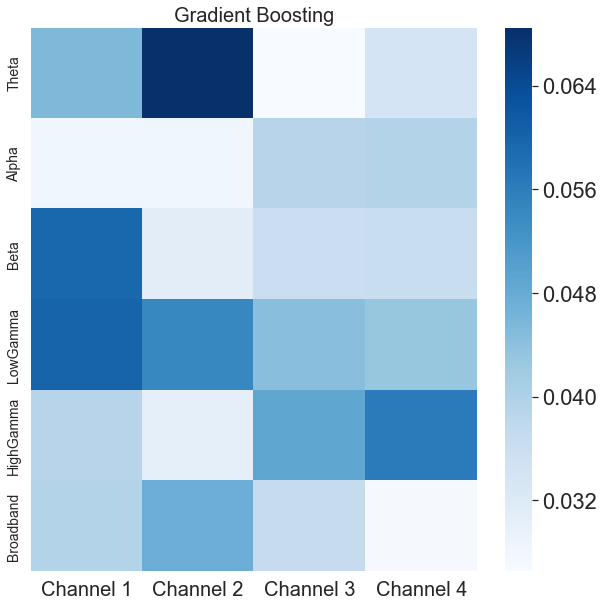

['LowGamma2', 'HighGamma4']
The 3 most important features for Gradient Boosting are LowGamma1, Theta2, 
[[0.0455 0.0685 0.0265 0.034 ]
 [0.028  0.028  0.039  0.0395]
 [0.0595 0.031  0.036  0.0365]
 [0.06   0.0545 0.0445 0.043 ]
 [0.039  0.0305 0.049  0.0565]
 [0.0395 0.0475 0.037  0.027 ]]


In [32]:
if_abs = 1
if_save = 1
if_title = 1
for pat in pats:
    plot_funcs.feature_importance(pat, 1, if_save = if_save, if_abs = if_abs, if_title = if_title)
    plot_funcs.feature_importance(pat, 7, if_save = if_save, if_abs = if_abs, if_title = if_title)


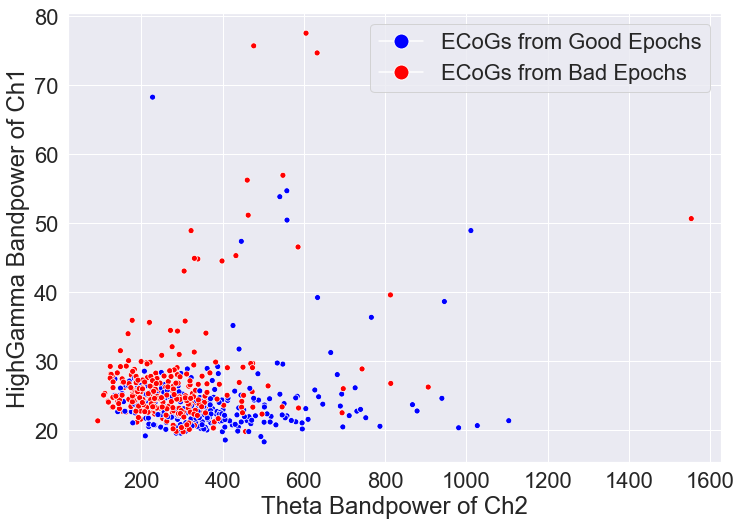

In [14]:
## import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
features = ['theta2', 'highgamma1']
pat = p241
# features = ['highgamma3', 'highgamma4']
# pat = p231


data_s = pat.features
data_s.loc[data_s['label'] == True, 'label2'] = 'good'
data_s.loc[data_s['label'] == False, 'label2'] = 'bad'
colors = ["bright red", "sky"]
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=2)
g = sns.scatterplot(x = features[0], y = features[1], hue = 'label2', data = data_s,legend = False, palette={'bad':"red", 'good':"blue"})

legend_elements = [Line2D([0], [0], marker='o', color='w', label='ECoGs from Good Epochs',
                          markerfacecolor='blue', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='ECoGs from Bad Epochs',
                          markerfacecolor='red', markersize=15),]

# Create the figure

ax.legend(handles=legend_elements, loc='center')

plt.setp(g.get_legend().get_texts(), fontsize='10') # for legend text
#plt.title('Patient {0}  Scatter Plot'.format(pat.id), fontsize=hp.label_fontsize)
#plt.legend(['bad','good'], fontsize=hp.label_fontsize)
ax.legend(handles=legend_elements, fontsize=hp.label_fontsize)
# plt.xlabel('Theta2')
# plt.ylabel('HighGamma1')
plt.xlabel('Theta Bandpower of Ch2')
plt.ylabel('HighGamma Bandpower of Ch1')
plt.savefig('../fig/'+ pat.id + '/scatter.png')
plt.show()

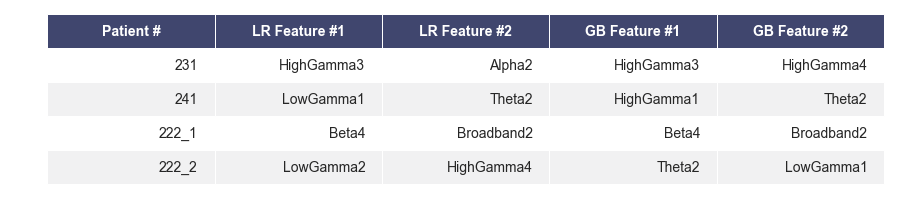

In [33]:
fi_lists = []
for pat in [p231,p241,p222_1,p222_2]:
    fi_list = []
    fi_list.append(pat.id)
    for fea in pat.topfeatures_1:
        fi_list.append(fea)
    for fea in pat.topfeatures_7:
        fi_list.append(fea)
    fi_lists.append(fi_list)
fi_df = pd.DataFrame(fi_lists, columns = ['Patient #', 'LR Feature #1', 'LR Feature #2', 'GB Feature #1', 'GB Feature #2'])
plot_funcs.render_mpl_table(fi_df, p231, label = 'fi_summary', if_save = 1, if_title = 0)

In [41]:
ifea_231 = ['highgamma3', 'highgamma4', 'alpha2']
ifea_label_231 = ['Highgamma3', 'Highgamma4', 'Alpha2']

ifea_241 = ['lowgamma1', 'highgamma1', 'theta2']
ifea_label_241 = ['Lowgamma1', 'Highgamma1', 'Theta2']

<IPython.core.display.Javascript object>


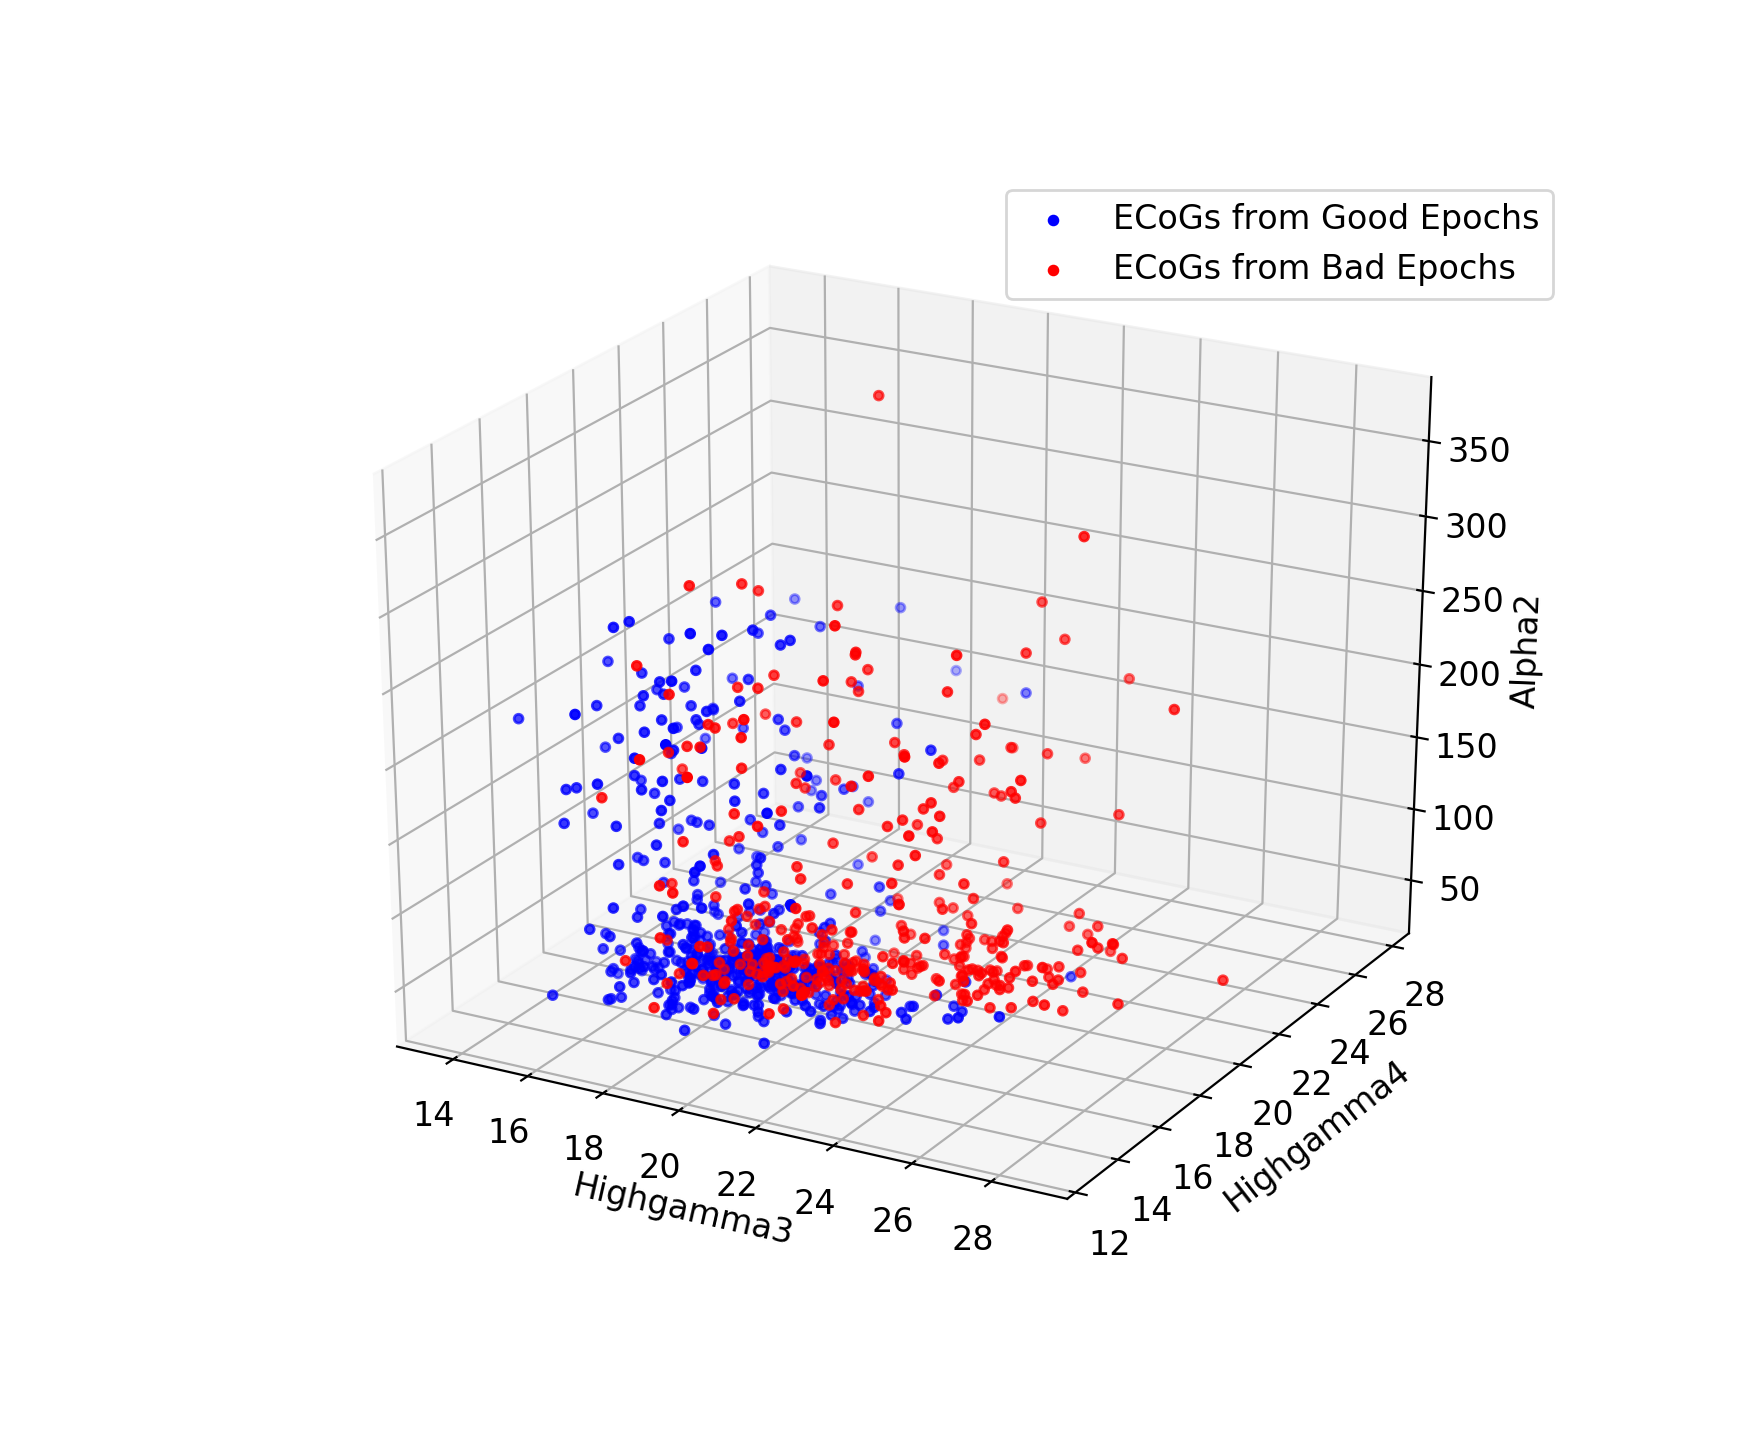

In [52]:
%matplotlib notebook
import matplotlib
matplotlib.rcdefaults() 

font = {'family' : 'normal',
        'size'   : 12}

matplotlib.rc('axes', titlesize=12)
matplotlib.rc('font', **font)
JJ.scatter_plot_3d(p231, var_list = ifea_231, label_list = ifea_label_231)

<IPython.core.display.Javascript object>


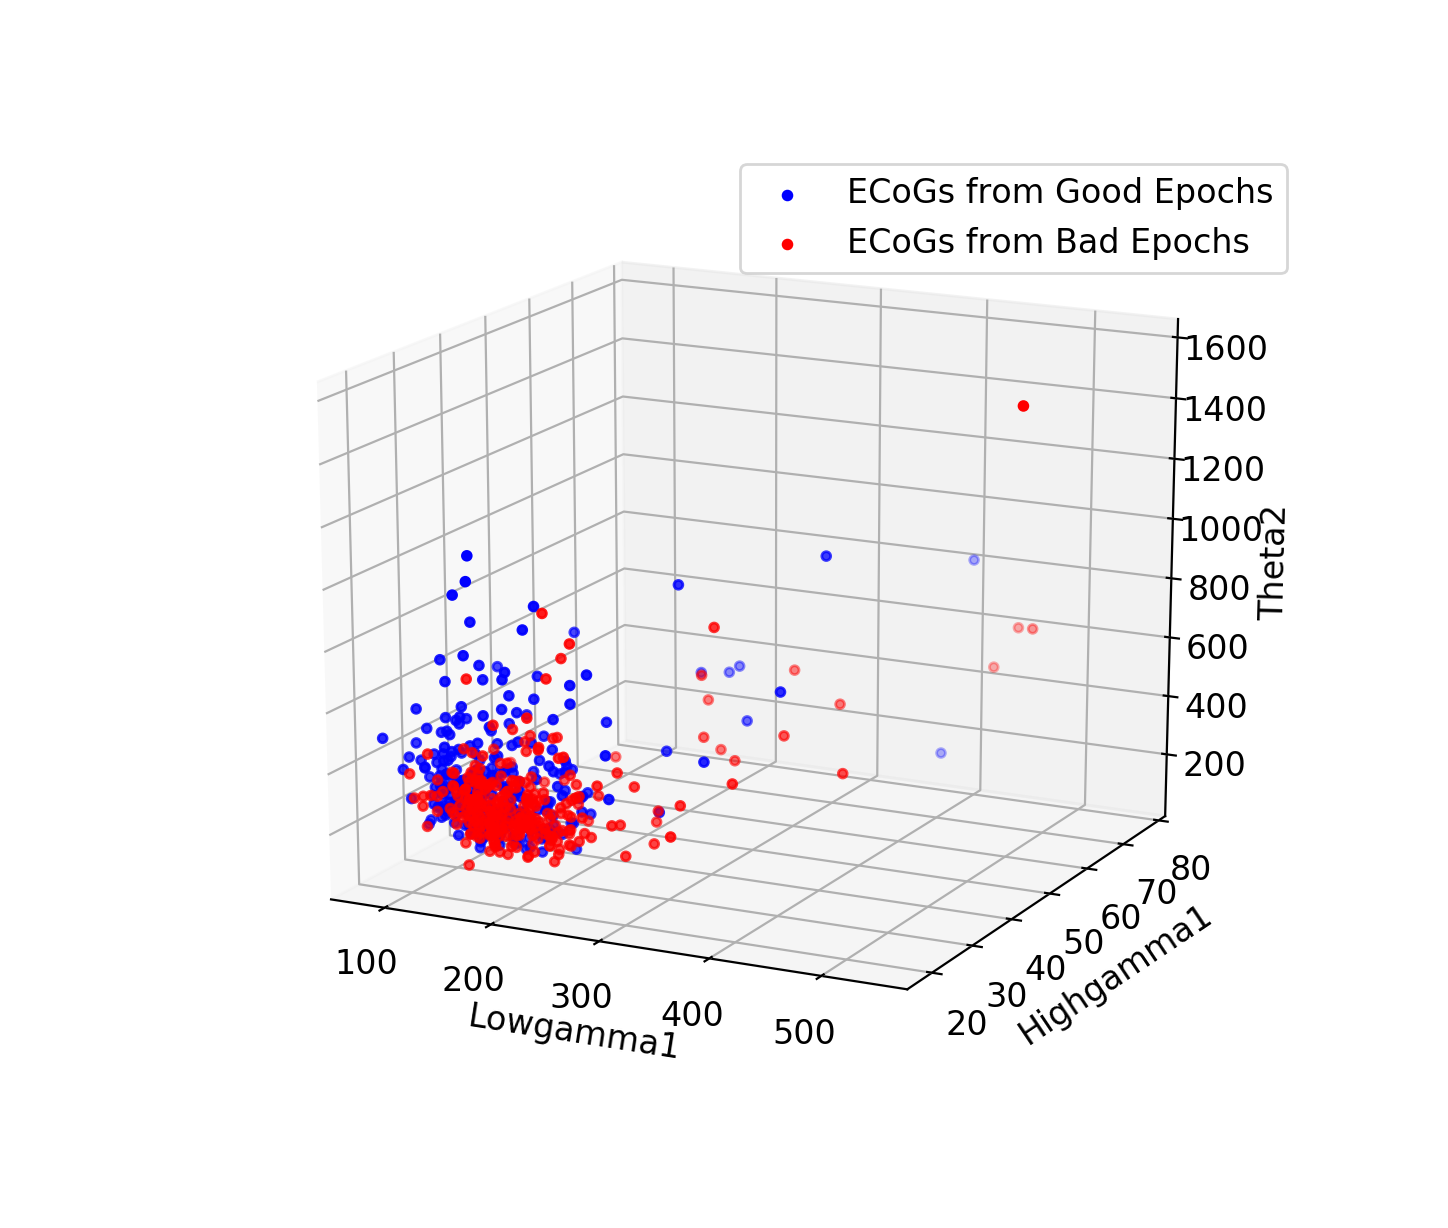

In [54]:
JJ.scatter_plot_3d(p241, var_list = ifea_241, label_list=ifea_label_241)

In [34]:
p231.features

filename             region_start_time  long_epi  sleep      delta1  \
647   1.313099e+17 2017-02-07 04:00:29.000016000  0.0       1.0    52.540879    
648   1.313099e+17 2017-02-07 10:00:27.000028800  0.0       0.0    67.371989    
649   1.313100e+17 2017-02-07 16:00:26.000035200  0.0       0.0    99.857643    
650   1.313103e+17 2017-02-07 22:00:13.000032000  0.0       0.0    129.677420   
651   1.313103e+17 2017-02-08 04:00:12.000038400  0.0       1.0    91.679727    
652   1.313108e+17 2017-02-08 10:00:10.999958400  0.0       0.0    116.925373   
653   1.313108e+17 2017-02-08 16:00:09.999964800  0.0       0.0    89.494190    
654   1.313117e+17 2017-02-09 15:59:54.999974400  0.0       0.0    82.446978    
655   1.313126e+17 2017-02-09 21:59:42.999964800  0.0       0.0    326.016488   
656   1.313126e+17 2017-02-10 03:59:41.999971200  0.0       1.0    72.776059    
657   1.313126e+17 2017-02-10 09:59:40.999977600  0.0       0.0    108.229481   
658   1.313126e+17 2017-02-10 15:59:38.999990400  0.0       0.0    85.071146    
659   1.313129e+17 2017-02-10 21:59:26.999980800  0.0       0.0    111.902551   
660   1.313129e+17 2017-02-11 03:59:25.999987200  0.0       1.0    201.461377   
661   1.313134e+17 2017-02-11 09:59:25.999987200  0.0       0.0    60.616129    
662   1.313134e+17 2017-02-11 15:59:24.000000000  0.0       0.0    123.753541   
663   1.313143e+17 2017-02-12 15:59:07.000022400  0.0       0.0    105.109073   
664   1.313151e+17 2017-02-13 09:58:55.000012800  0.0       0.0    94.931808    
665   1.313151e+17 2017-02-13 15:58:54.000019200  0.0       0.0    209.120596   
666   1.313160e+17 2017-02-13 21:58:41.000016000  0.0       0.0    127.633468   
667   1.313160e+17 2017-02-14 03:58:39.000028800  0.0       1.0    110.453902   
668   1.313160e+17 2017-02-14 09:58:38.000035200  0.0       0.0    118.026761   
669   1.313160e+17 2017-02-14 15:58:37.000041600  0.0       0.0    95.580090    
670   1.313178e+17 2017-02-16 09:58:08.999961600  0.0       0.0    117.004756   
671   1.313178e+17 2017-02-16 15:58:07.999968000  0.0       0.0    99.109436    
672   1.313187e+17 2017-02-16 21:57:54.999964800  0.0       0.0    453.855925   
673   1.313187e+17 2017-02-17 03:57:53.999971200  0.0       1.0    289.936093   
674   1.313187e+17 2017-02-17 09:57:51.999984000  0.0       0.0    113.337014   
675   1.313187e+17 2017-02-17 15:57:50.999990400  0.0       0.0    92.519170    
676   1.313190e+17 2017-02-17 21:57:38.999980800  0.0       0.0    307.360492   
677   1.313190e+17 2017-02-18 03:57:36.999993600  0.0       1.0    124.314776   
678   1.313195e+17 2017-02-18 09:57:37.999987200  0.0       0.0    76.204433    
679   1.313195e+17 2017-02-18 15:57:36.000000000  0.0       0.0    98.416434    
680   1.313204e+17 2017-02-18 21:57:23.999990400  0.0       0.0    390.385652   
681   1.313204e+17 2017-02-19 03:57:22.999996800  0.0       1.0    158.472801   
682   1.313204e+17 2017-02-19 09:57:22.000003200  0.0       0.0    69.980259    
683   1.313204e+17 2017-02-19 15:57:20.000015999  0.0       0.0    85.529898    
684   1.313208e+17 2017-02-19 21:57:08.000006400  0.0       0.0    314.449062   
685   1.313208e+17 2017-02-20 03:57:07.000012800  0.0       1.0    171.313947   
686   1.313212e+17 2017-02-20 09:57:06.000019200  0.0       0.0    65.611015    
687   1.313212e+17 2017-02-20 15:57:05.000025600  0.0       0.0    61.261887    
688   1.313221e+17 2017-02-20 21:56:54.000009600  0.0       0.0    227.575099   
689   1.313221e+17 2017-02-21 03:56:53.000016000  0.0       1.0    77.789087    
690   1.313221e+17 2017-02-21 09:56:52.000022400  0.0       0.0    73.630912    
691   1.313221e+17 2017-02-21 15:56:50.000035200  0.0       0.0    96.956591    
692   1.313229e+17 2017-02-21 21:56:38.000025600  0.0       0.0    188.976039   
693   1.313229e+17 2017-02-22 03:56:36.000038400  0.0       1.0    99.018581    
694   1.313229e+17 2017-02-22 09:56:35.000044800  0.0       0.0    87.488023    
695   1.313229e+17 2017-02-22 15:56:33.99

In [172]:
fi_list

['231', 'alpha2', 'highgamma3', 'highgamma4', 'highgamma3']

Patient  231


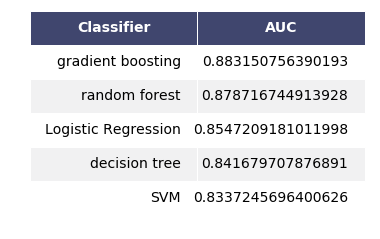

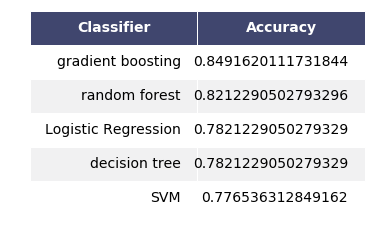

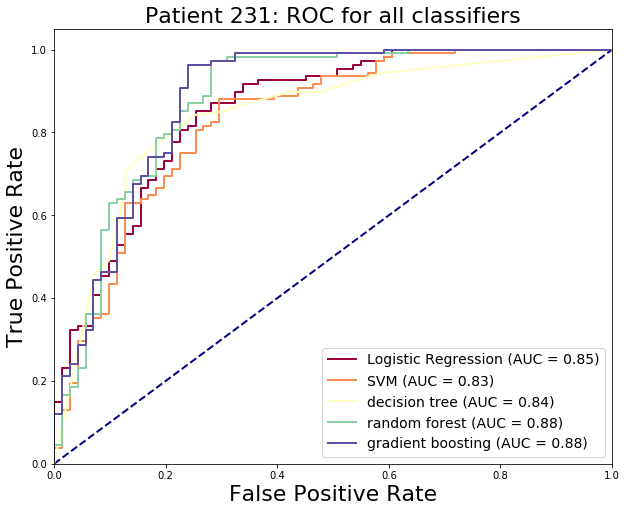

Patient  231


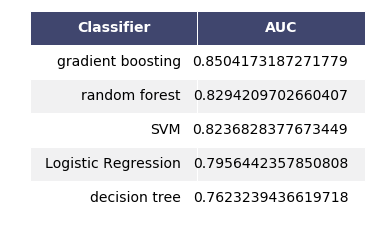

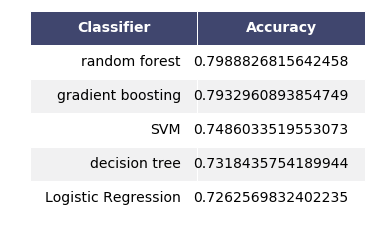

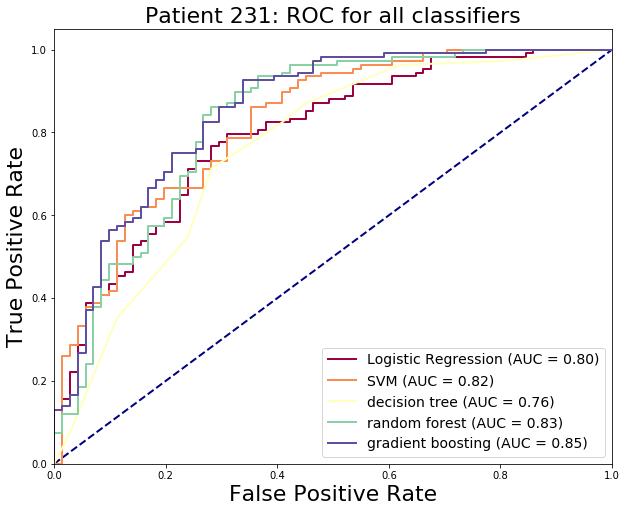

Patient  231


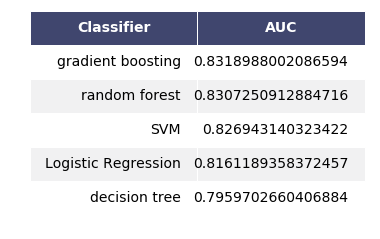

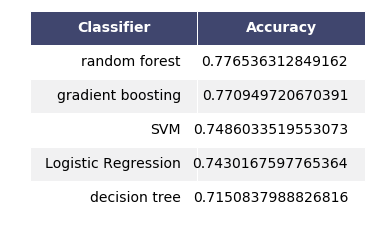

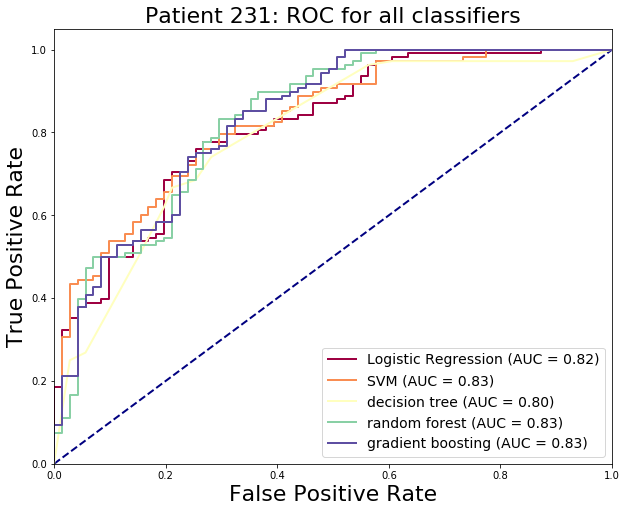

Patient  231


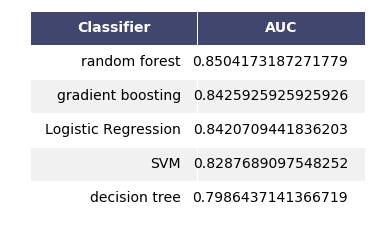

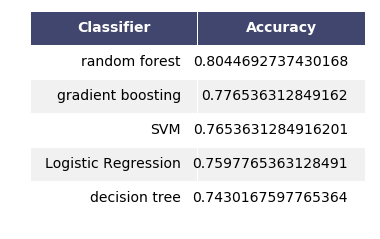

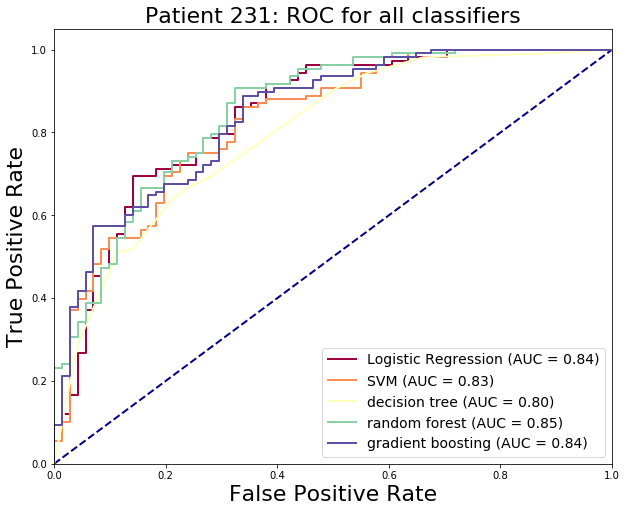

In [34]:
labels = ['_90_nd', '_rs77', '_rs11', '_rs93']
show_pat_results('231',labels)

Patient  231


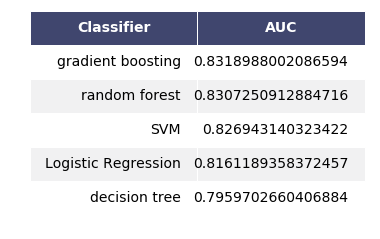

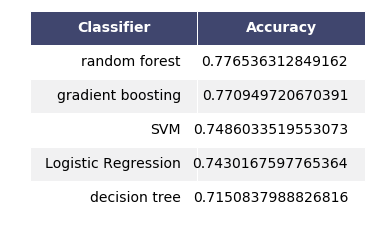

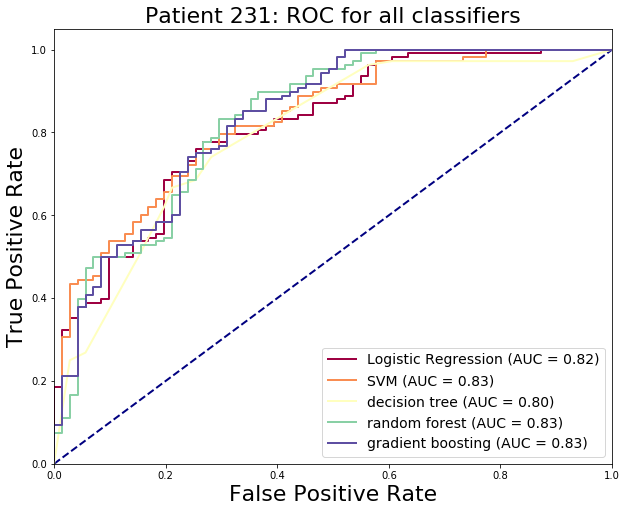

Patient  222_1


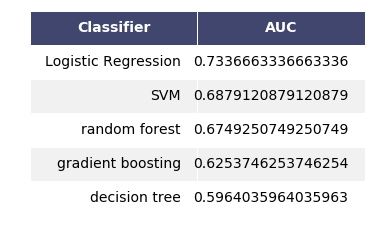

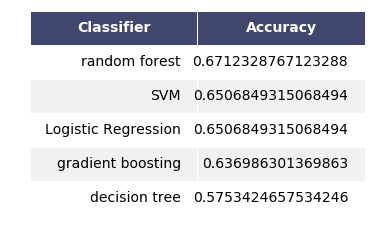

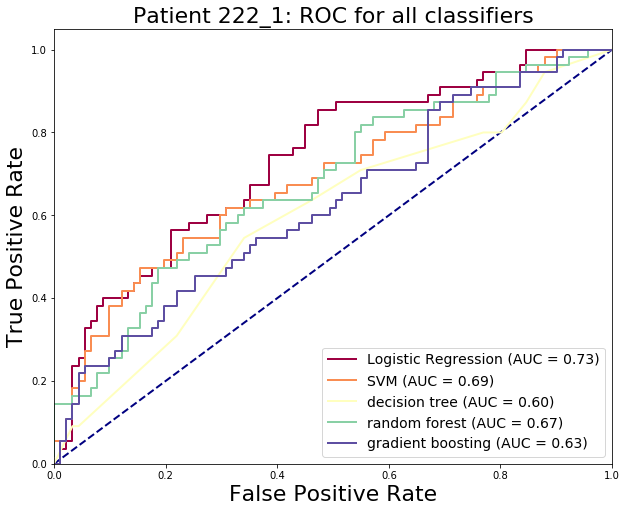

Patient  222_2


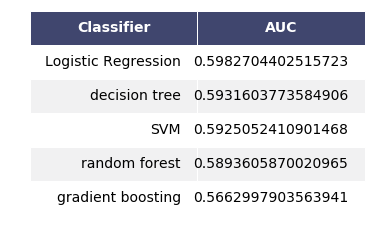

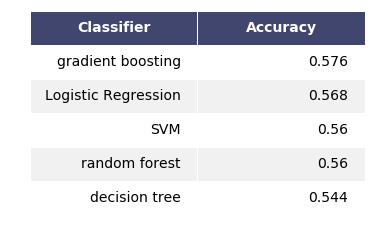

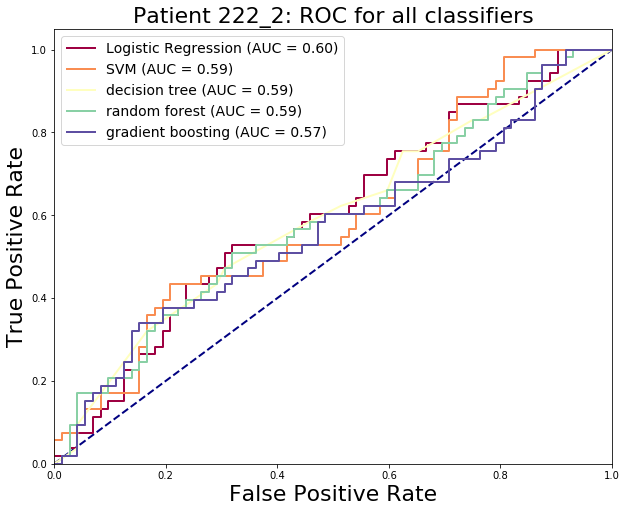

Patient  241


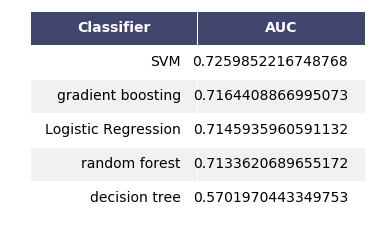

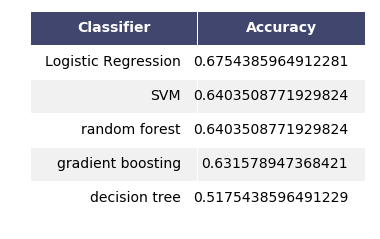

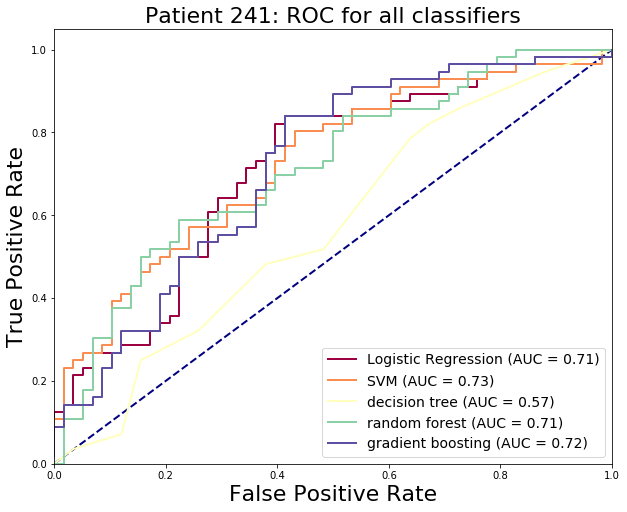

TypeError: plot_epoch_mean() got an unexpected keyword argument 'if_acc'

In [35]:
show_results('_rs11')

In [ ]:
show_results('_rs77')

In [ ]:
show_results('_rs93')

Patient  231


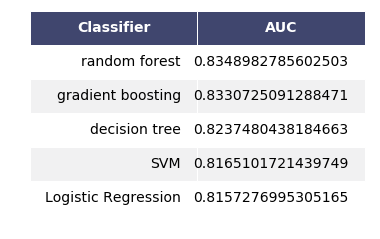

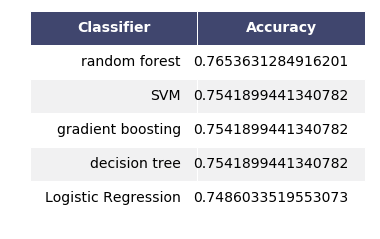

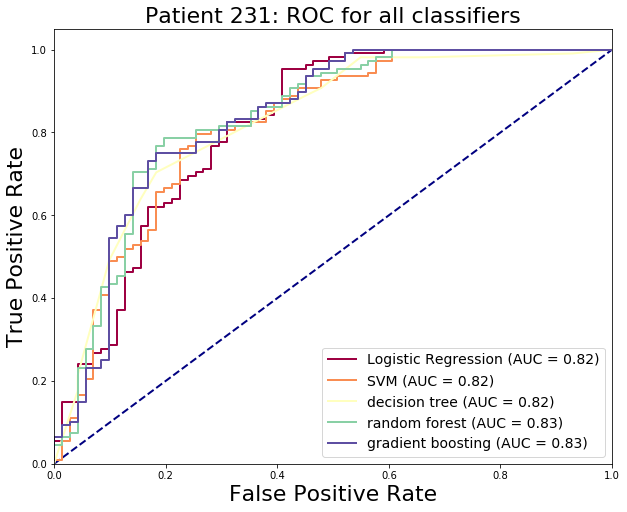

Patient  222_1


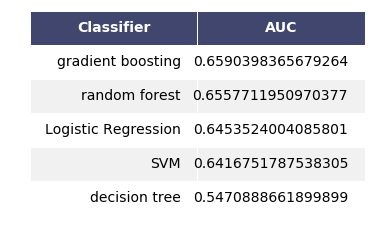

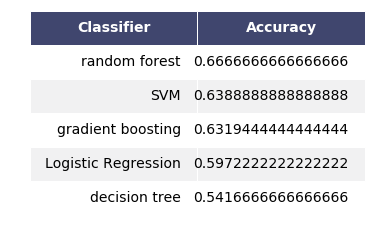

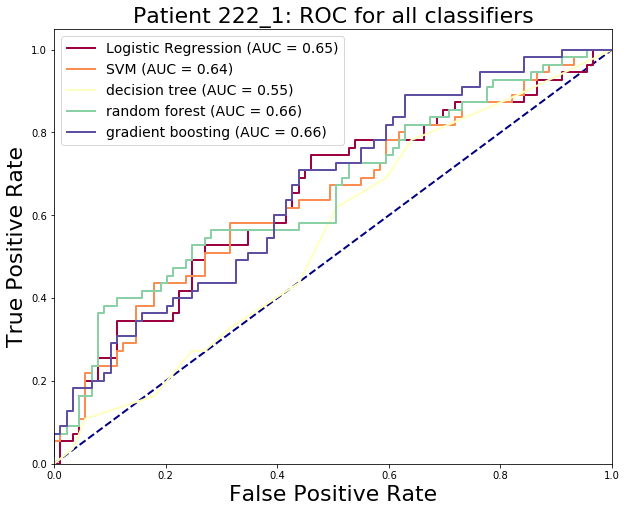

Patient  222_2


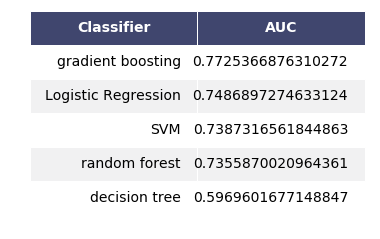

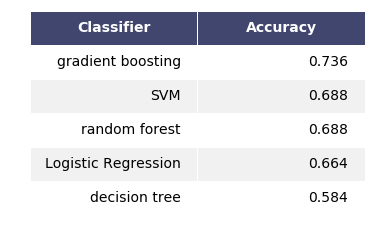

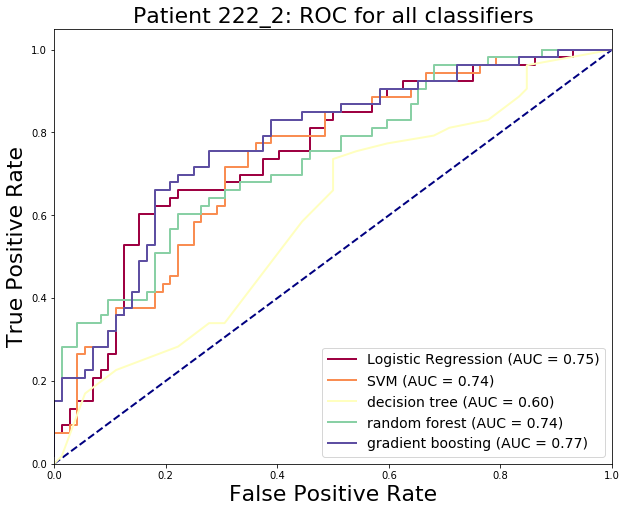

Patient  241


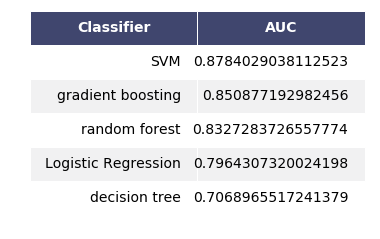

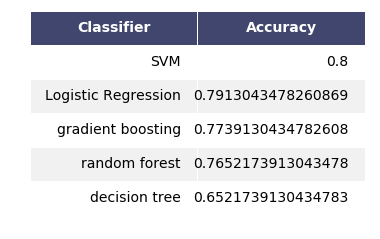

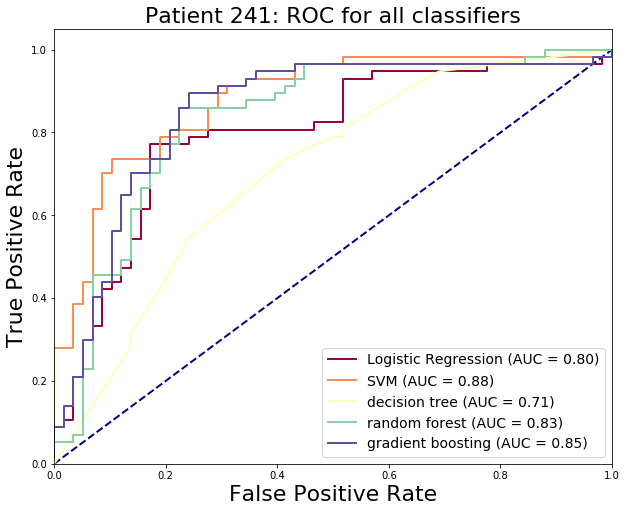

In [8]:
show_results('_split')

Patient  231


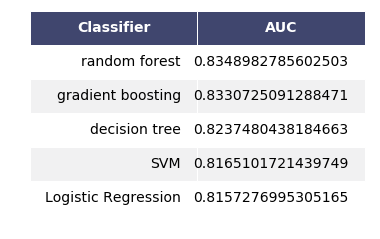

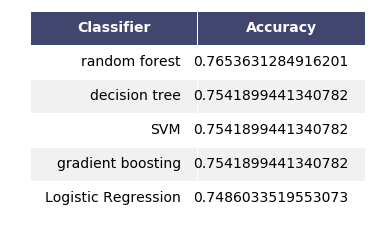

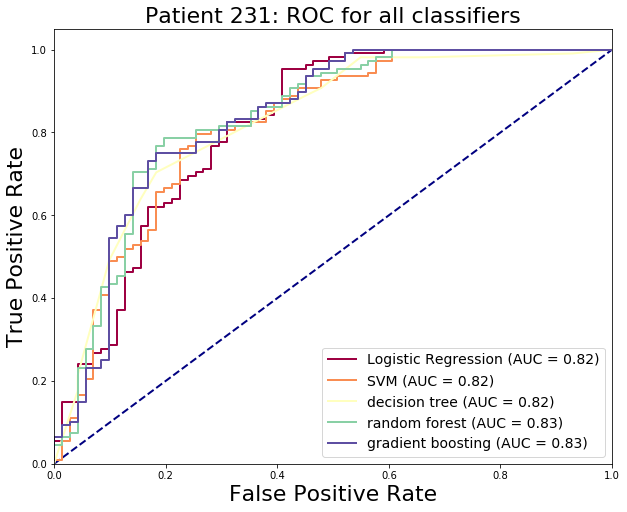

Patient  222_1


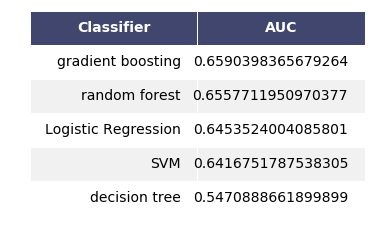

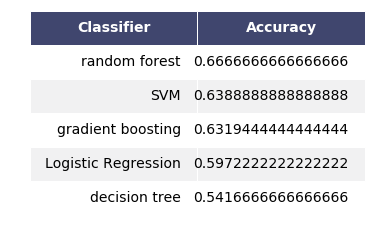

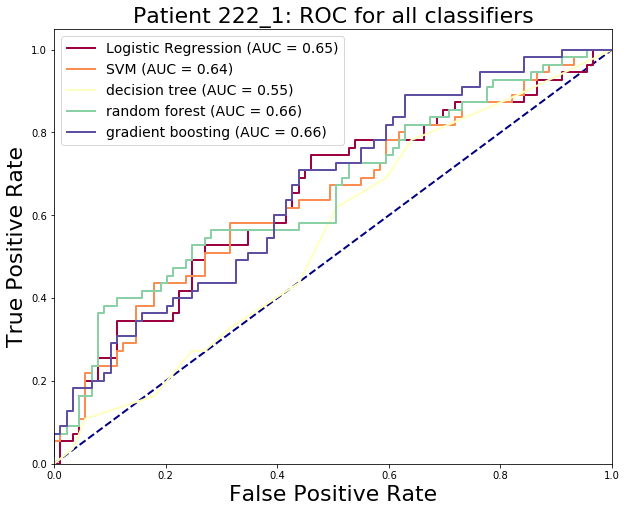

Patient  222_2


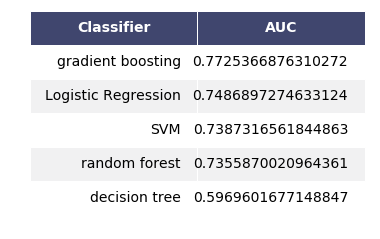

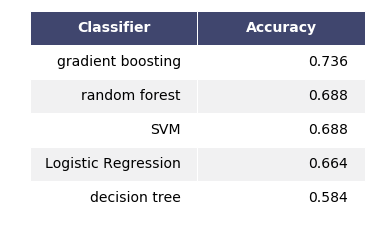

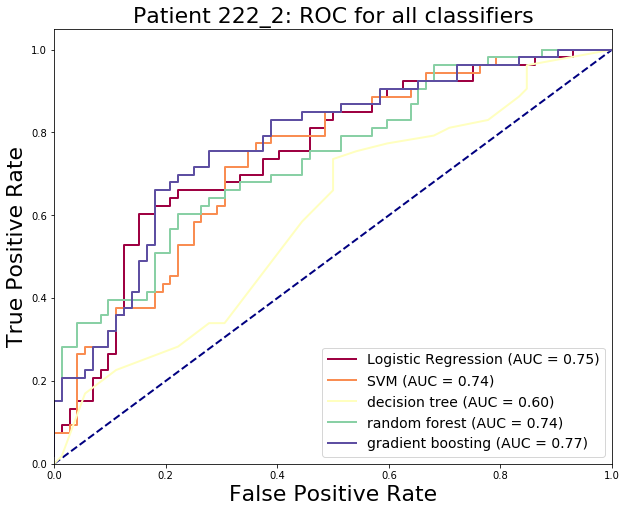

Patient  241


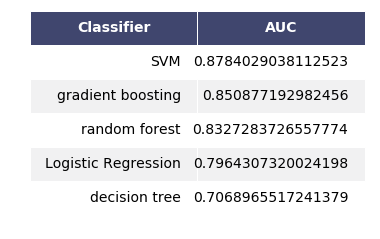

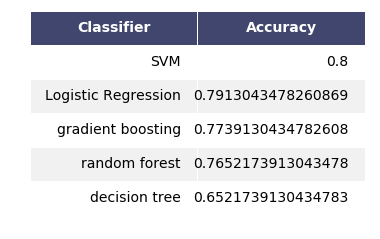

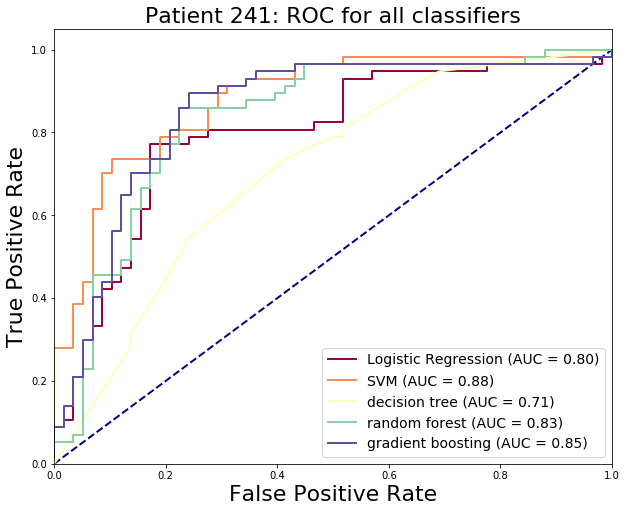

In [57]:
label = '_split'

p231 = pickle.load(open(hp.prepath_pat + '231_trained' + label + '.p', "rb" ))
p222_1 = pickle.load(open(hp.prepath_pat + '222_1_trained' + label + '.p', "rb" ))
p222_2 = pickle.load(open(hp.prepath_pat + '222_2_trained' + label + '.p', "rb" ))
p241 = pickle.load(open(hp.prepath_pat + '241_trained' + label + '.p', "rb" ))
pats = [p231, p222_1, p222_2, p241]

for pat in pats:
    print('Patient ', pat.id)
    X_train, X_test, y_train, y_test = pat.X_train, pat.X_test, pat.y_train, pat.y_test
    JJ.scores_estimators(X_test, y_test, pat= pat, if_save = 0)
    plot_funcs.plot_roc_all(X_test, y_test, pat =pat, if_save = 0)

Patient  231


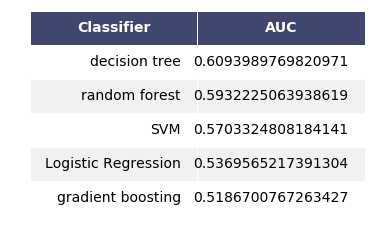

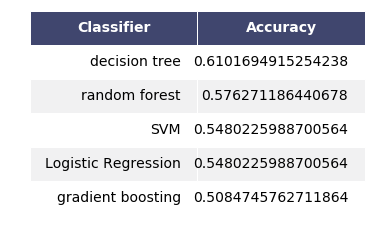

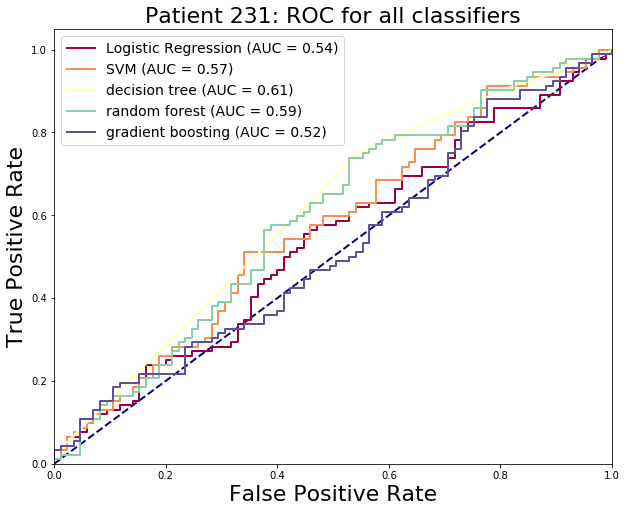

Patient  222_1


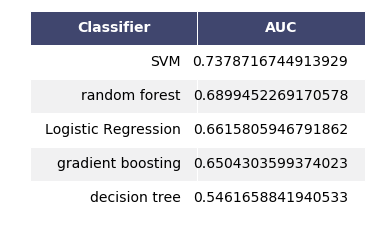

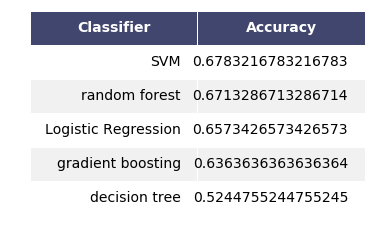

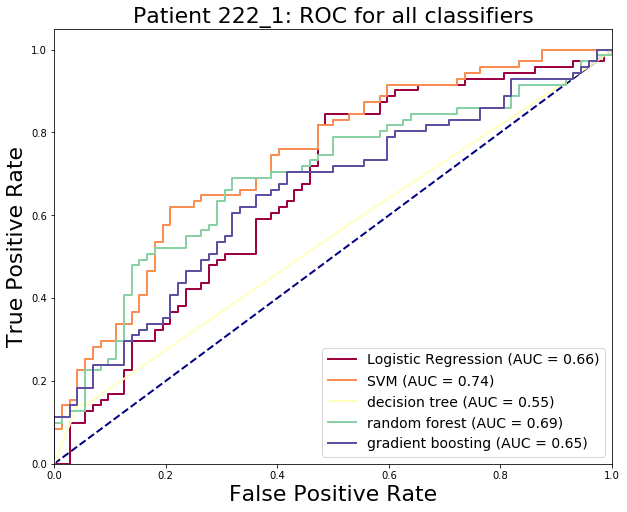

Patient  222_2


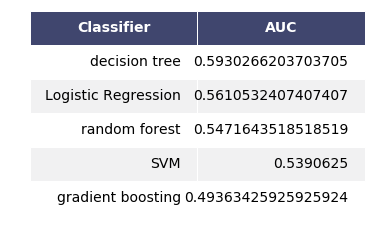

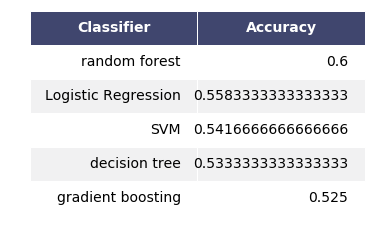

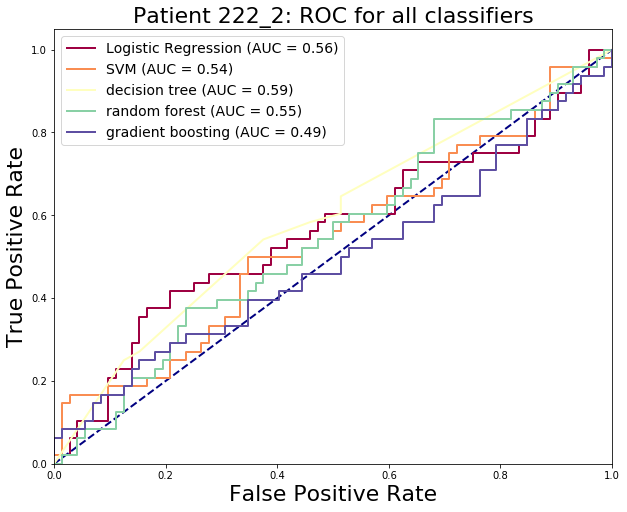

Patient  241


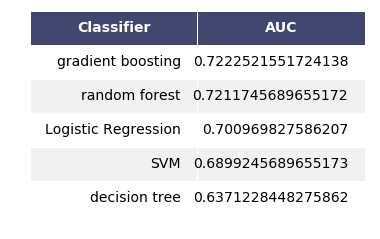

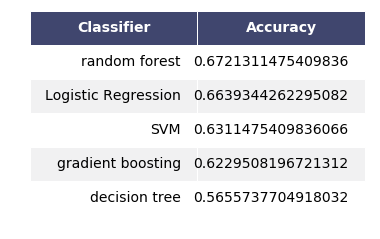

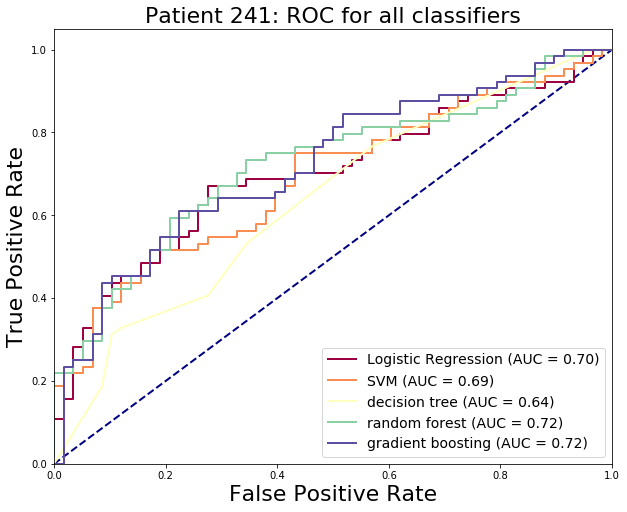

In [55]:
label = '_w'

p231 = pickle.load(open(hp.prepath_pat + '231_trained' + label + '.p', "rb" ))
p222_1 = pickle.load(open(hp.prepath_pat + '222_1_trained' + label + '.p', "rb" ))
p222_2 = pickle.load(open(hp.prepath_pat + '222_2_trained' + label + '.p', "rb" ))
p241 = pickle.load(open(hp.prepath_pat + '241_trained' + label + '.p', "rb" ))
pats = [p231, p222_1, p222_2, p241]

for pat in pats:
    print('Patient ', pat.id)
    X_train, X_test, y_train, y_test = pat.X_train, pat.X_test, pat.y_train, pat.y_test
    JJ.scores_estimators(X_test, y_test, pat= pat, if_save = 0)
    plot_funcs.plot_roc_all(X_test, y_test, pat =pat, if_save = 0)

Patient  231


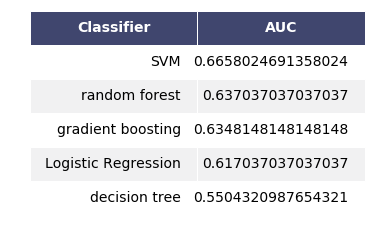

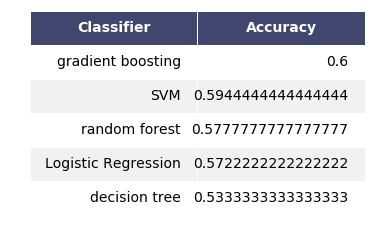

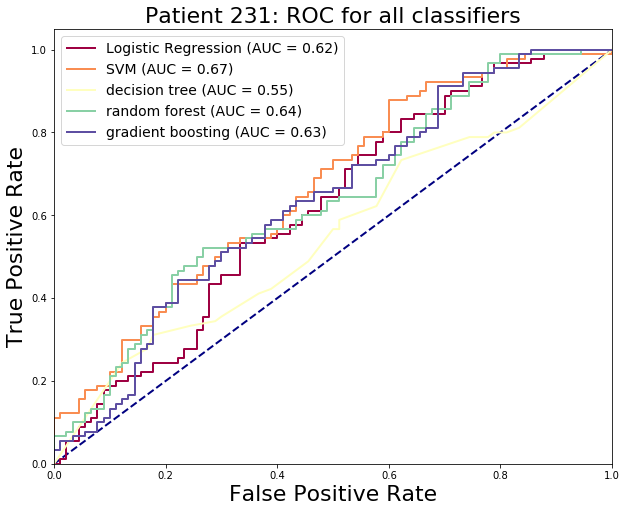

Patient  222_1


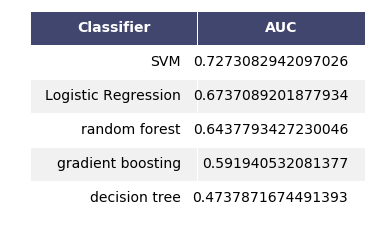

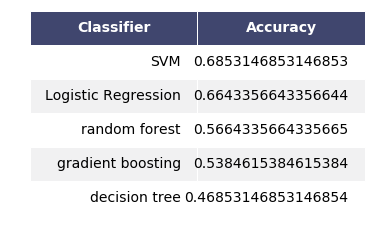

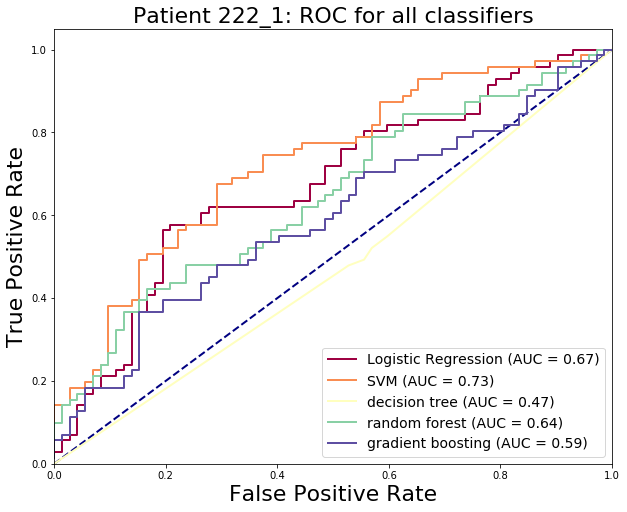

Patient  222_2


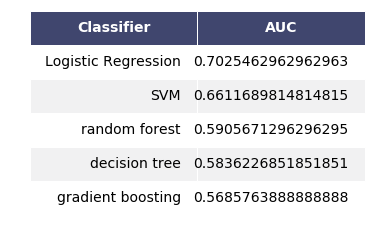

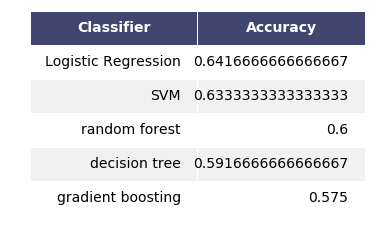

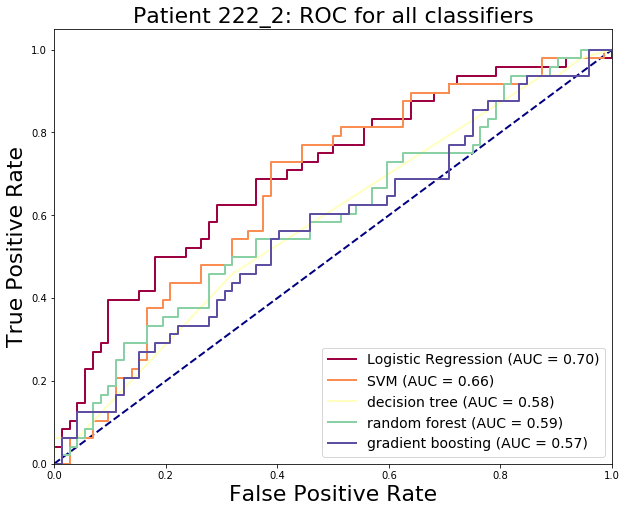

Patient  241


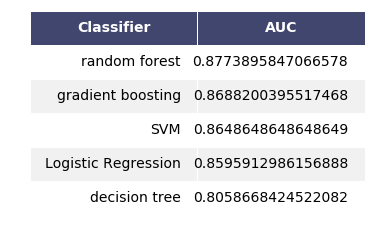

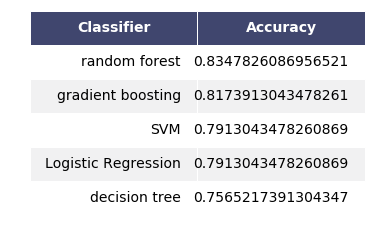

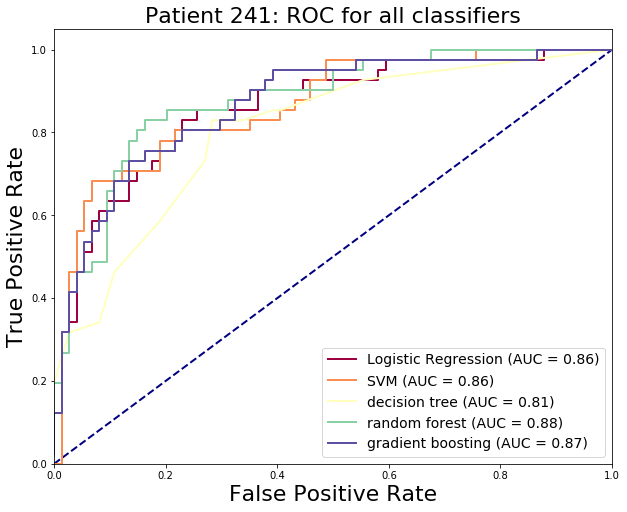

In [58]:
label = '_2w'

p231 = pickle.load(open(hp.prepath_pat + '231_trained' + label + '.p', "rb" ))
p222_1 = pickle.load(open(hp.prepath_pat + '222_1_trained' + label + '.p', "rb" ))
p222_2 = pickle.load(open(hp.prepath_pat + '222_2_trained' + label + '.p', "rb" ))
p241 = pickle.load(open(hp.prepath_pat + '241_trained' + label + '.p', "rb" ))
pats = [p231, p222_1, p222_2, p241]

for pat in pats:
    print('Patient ', pat.id)
    X_train, X_test, y_train, y_test = pat.X_train, pat.X_test, pat.y_train, pat.y_test
    JJ.scores_estimators(X_test, y_test, pat= pat, if_save = 0)
    plot_funcs.plot_roc_all(X_test, y_test, pat =pat, if_save = 0)

Patient  231


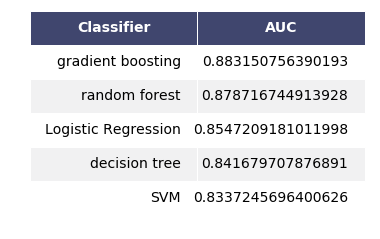

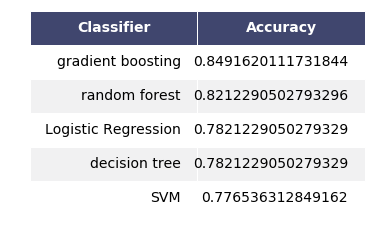

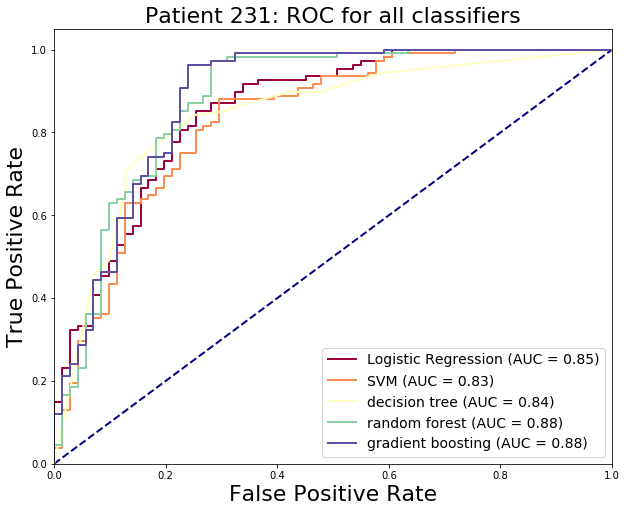

Patient  222_1


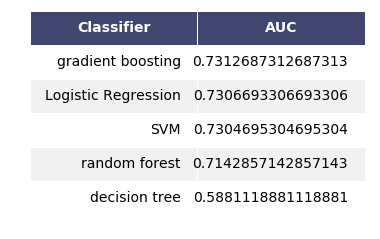

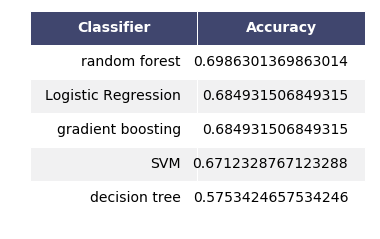

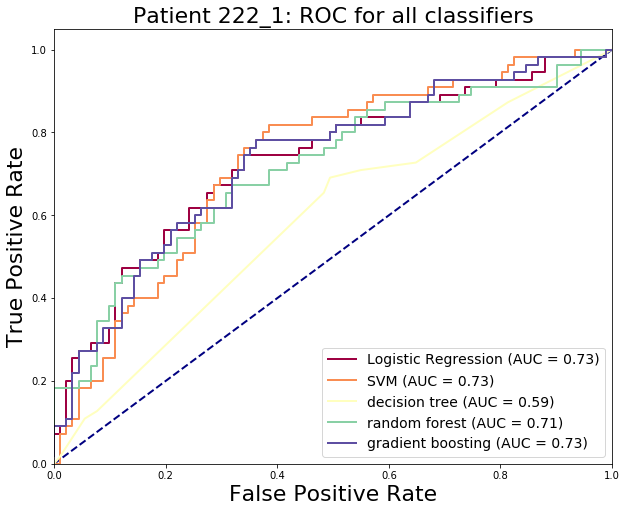

Patient  222_2


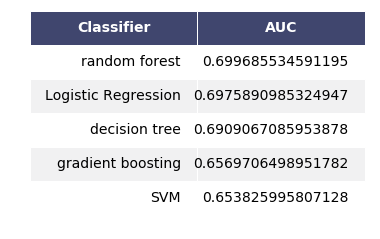

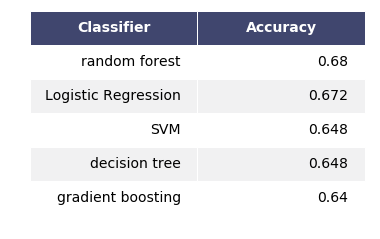

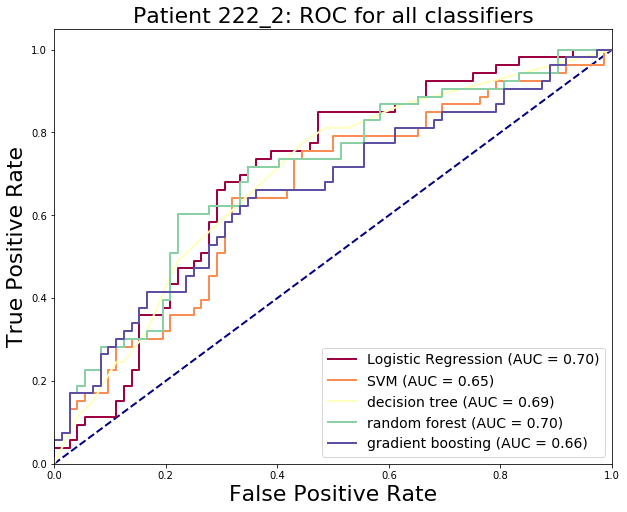

Patient  241


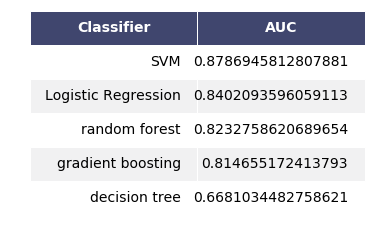

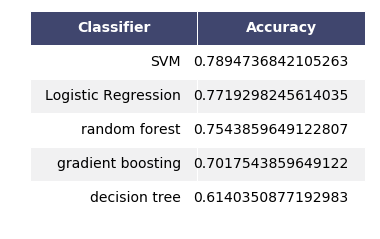

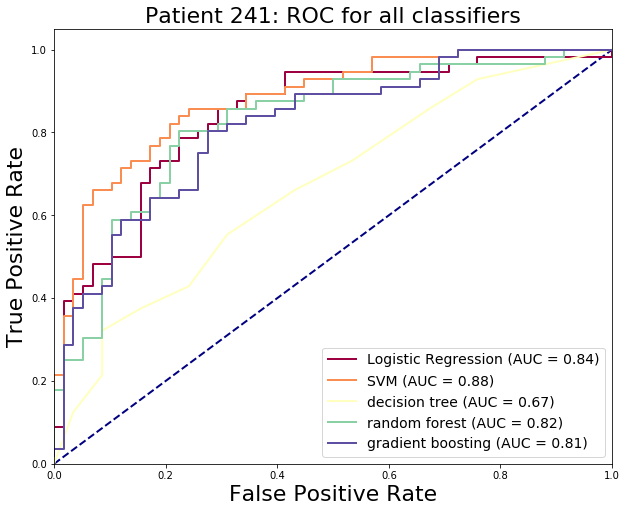

In [36]:
label = '_90_nd'
p231 = pickle.load(open(hp.prepath_pat + '231_trained' + label + '.p', "rb" ))
p222_1 = pickle.load(open(hp.prepath_pat + '222_1_trained' + label + '.p', "rb" ))
p222_2 = pickle.load(open(hp.prepath_pat + '222_2_trained' + label + '.p', "rb" ))
p241 = pickle.load(open(hp.prepath_pat + '241_trained' + label + '.p', "rb" ))
pats = [p231, p222_1, p222_2, p241]

for pat in pats:
    print('Patient ', pat.id)
    X_train, X_test, y_train, y_test = pat.X_train, pat.X_test, pat.y_train, pat.y_test
    JJ.scores_estimators(X_test, y_test, pat= pat, if_save = 0)
    plot_funcs.plot_roc_all(X_test, y_test, pat =pat, if_save = 0)

## 3. Classifier Performance

### Performace Overview of each Classifier

Patient  231


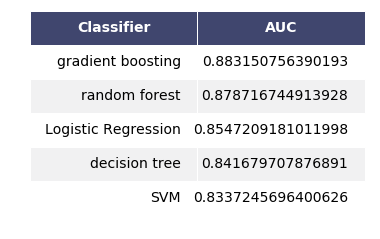

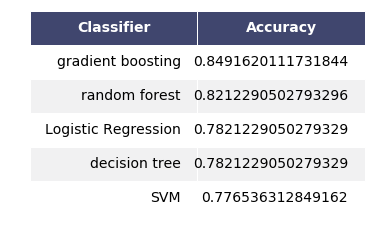

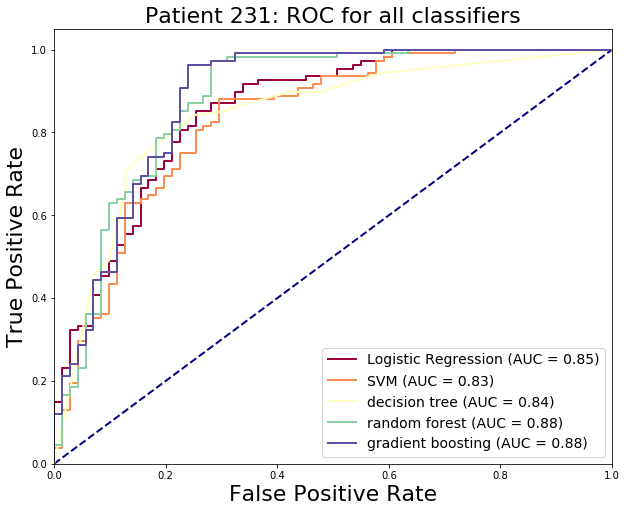

Patient  222_1


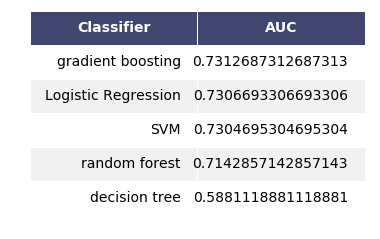

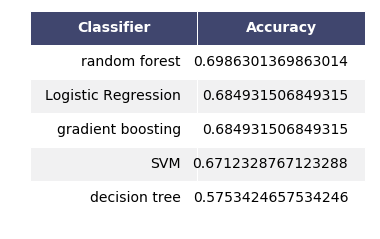

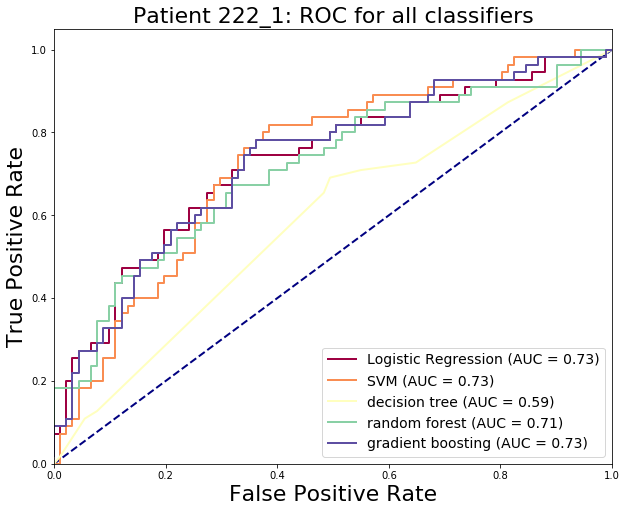

Patient  222_2


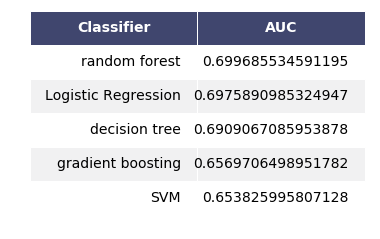

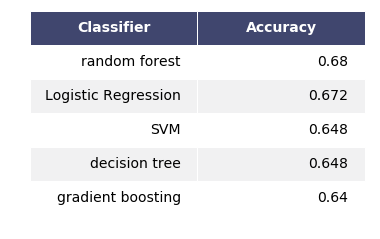

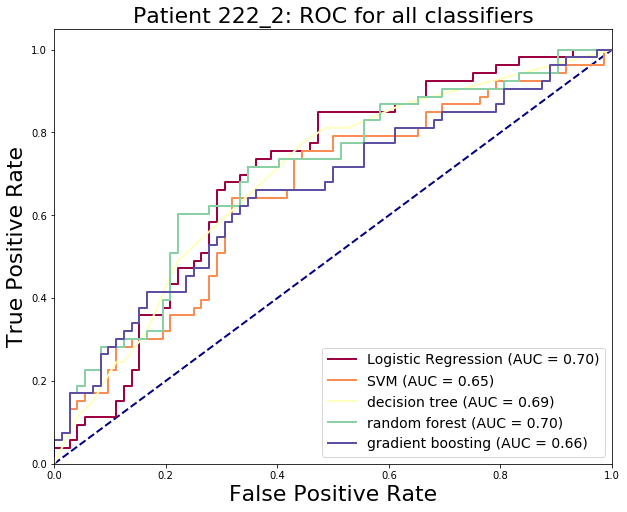

Patient  241


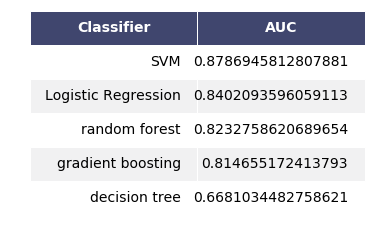

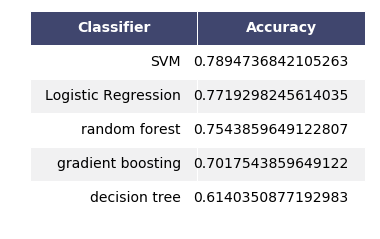

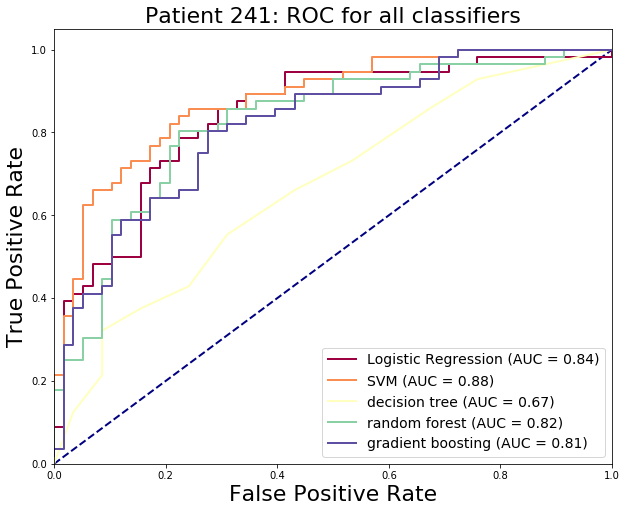

In [18]:
for pat in pats:
    print('Patient ', pat.id)
    X_train, X_test, y_train, y_test = pat.X_train, pat.X_test, pat.y_train, pat.y_test
    JJ.scores_estimators(X_test, y_test, pat= pat, if_save = 0)
    plot_funcs.plot_roc_all(X_test, y_test, pat =pat, if_save = 0)

### The confusion matrix and ROC of Gradient Boosting (the best classifier in this case)

<Figure size 720x576 with 0 Axes>

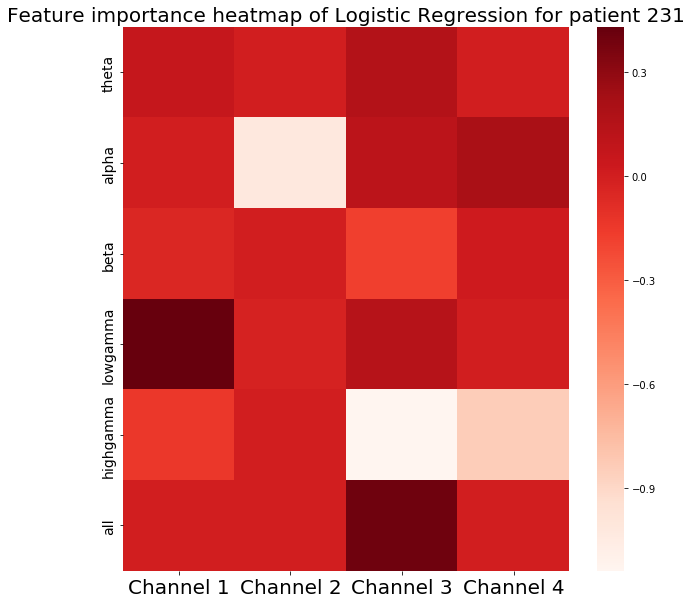

The 3 most important features for Logistic Regression are, alpha Channel 4 , all Channel 3 , lowgamma Channel 1 
[[ 0.06573661  0.          0.15852955  0.        ]
 [ 0.         -1.02042529  0.11699418  0.20623458]
 [-0.04348025  0.         -0.1764864   0.02016911]
 [ 0.42860538 -0.01974284  0.14124044  0.        ]
 [-0.14089606  0.         -1.13978751 -0.84553096]
 [ 0.          0.          0.40133948  0.        ]]


<Figure size 720x576 with 0 Axes>

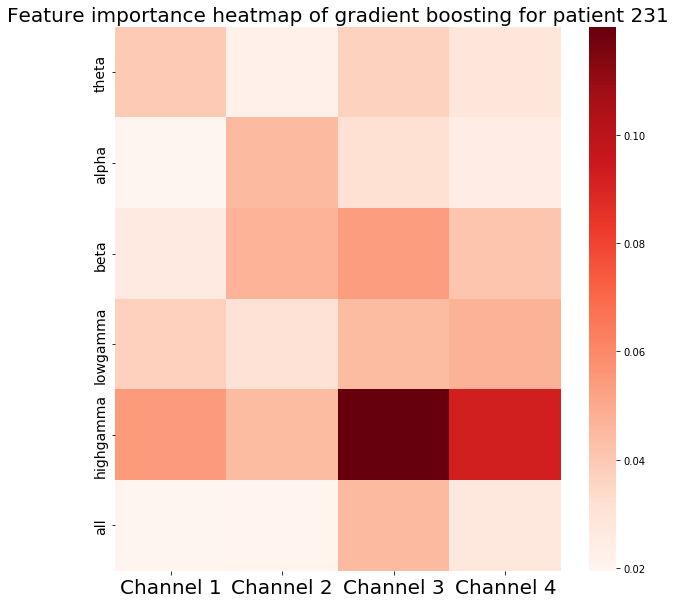

The 3 most important features for gradient boosting are, highgamma Channel 1 , highgamma Channel 4 , highgamma Channel 3 
[[0.03951255 0.02229448 0.03692956 0.02880391]
 [0.01945859 0.04487633 0.03175523 0.0243341 ]
 [0.0264017  0.04704591 0.05390382 0.04112368]
 [0.03747988 0.03086743 0.04428144 0.04760805]
 [0.05436701 0.04431513 0.11985103 0.09254828]
 [0.01951015 0.02032043 0.04493678 0.02747451]]


<Figure size 720x576 with 0 Axes>

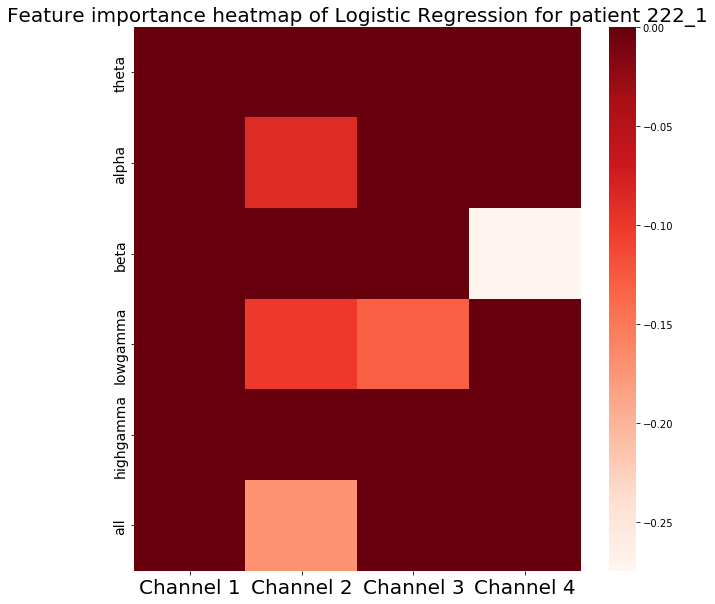

The 3 most important features for Logistic Regression are, theta Channel 2 , beta Channel 1 , all Channel 4 
[[ 0.          0.          0.          0.        ]
 [ 0.         -0.08720638  0.          0.        ]
 [ 0.          0.          0.         -0.27455344]
 [ 0.         -0.10101849 -0.12963663  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.         -0.17130217  0.          0.        ]]


<Figure size 720x576 with 0 Axes>

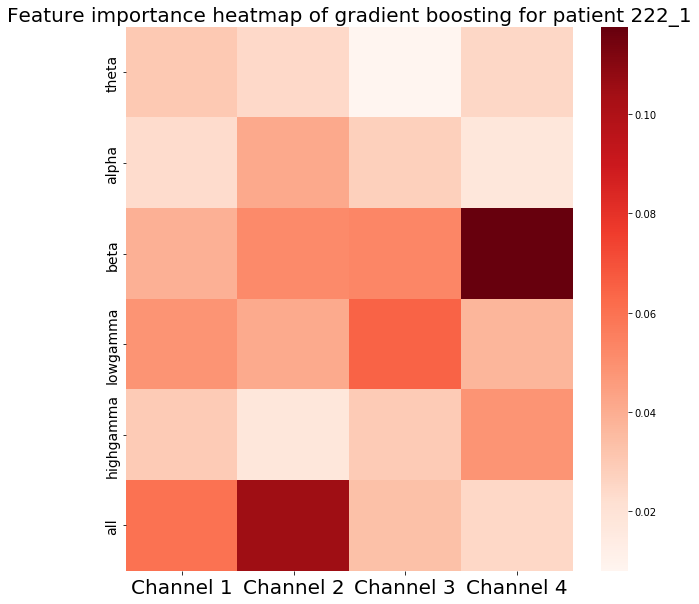

The 3 most important features for gradient boosting are, lowgamma Channel 3 , all Channel 2 , beta Channel 4 
[[0.0305 0.0245 0.008  0.0255]
 [0.023  0.0415 0.028  0.0175]
 [0.039  0.052  0.053  0.1175]
 [0.0485 0.041  0.0645 0.0375]
 [0.0295 0.0175 0.0295 0.0485]
 [0.06   0.105  0.0335 0.025 ]]


<Figure size 720x576 with 0 Axes>

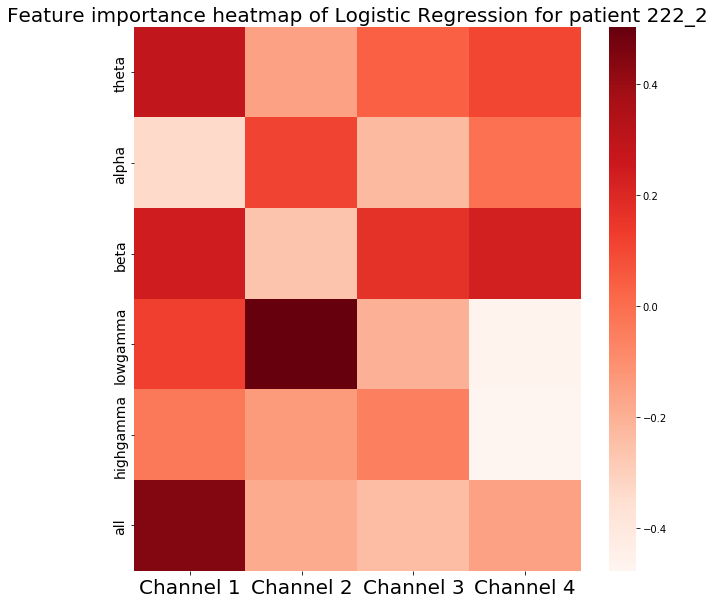

The 3 most important features for Logistic Regression are, theta Channel 1 , all Channel 1 , lowgamma Channel 2 
[[ 0.2912201  -0.1520037   0.0373267   0.1075703 ]
 [-0.33247818  0.11436609 -0.23146025 -0.00939546]
 [ 0.24272636 -0.25859725  0.16791432  0.23106962]
 [ 0.12361912  0.5016368  -0.1980347  -0.46394347]
 [-0.03141259 -0.13613751 -0.05228451 -0.4761082 ]
 [ 0.44649583 -0.18242025 -0.23888941 -0.15438142]]


<Figure size 720x576 with 0 Axes>

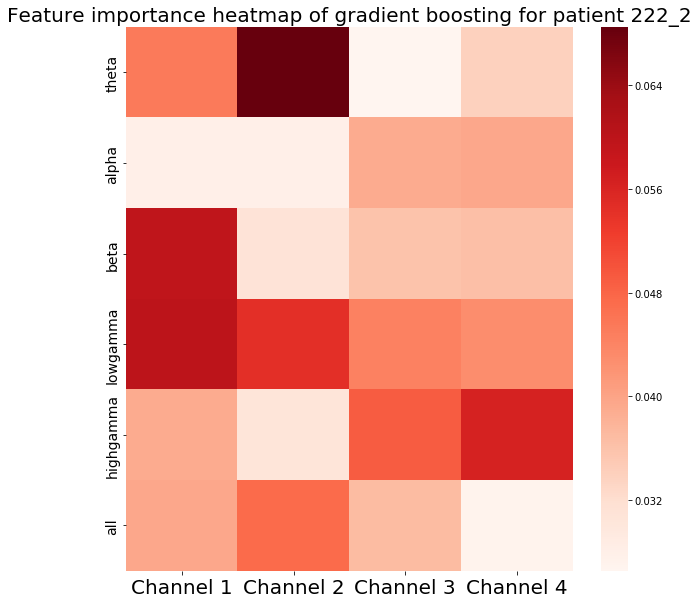

The 3 most important features for gradient boosting are, beta Channel 1 , theta Channel 2 , lowgamma Channel 1 
[[0.0455 0.0685 0.0265 0.034 ]
 [0.028  0.028  0.039  0.0395]
 [0.0595 0.031  0.036  0.0365]
 [0.06   0.0545 0.0445 0.043 ]
 [0.039  0.0305 0.049  0.0565]
 [0.0395 0.0475 0.037  0.027 ]]


<Figure size 720x576 with 0 Axes>

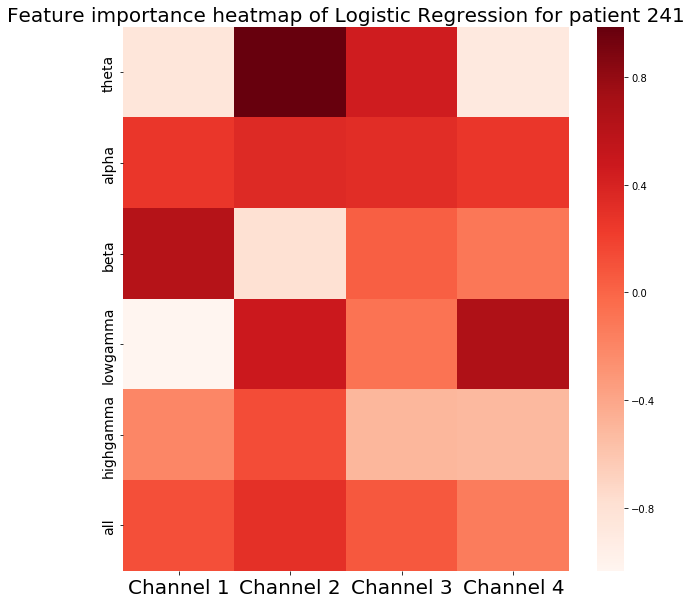

The 3 most important features for Logistic Regression are, beta Channel 1 , theta Channel 2 , lowgamma Channel 4 
[[-0.85107025  0.98509532  0.45442095 -0.88714106]
 [ 0.26208981  0.35368499  0.32515388  0.26695262]
 [ 0.62994561 -0.78897826  0.03649076 -0.10555708]
 [-1.03498146  0.47668319 -0.08194331  0.66363966]
 [-0.2029168   0.13343701 -0.50202049 -0.51728725]
 [ 0.1239647   0.30044963  0.0701549  -0.1394327 ]]


<Figure size 720x576 with 0 Axes>

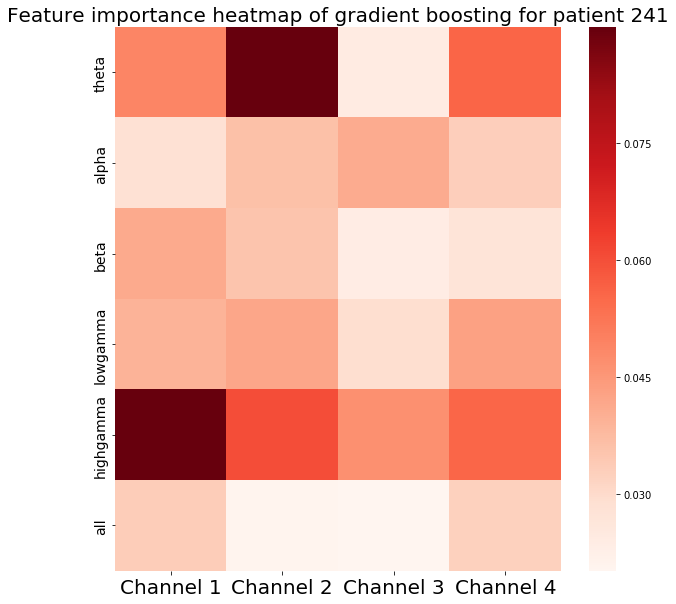

The 3 most important features for gradient boosting are, highgamma Channel 2 , theta Channel 2 , highgamma Channel 1 
[[0.04923288 0.08970373 0.02432875 0.05609423]
 [0.02841529 0.03626618 0.04091842 0.03302459]
 [0.04133485 0.03548417 0.02381569 0.02754489]
 [0.0393069  0.04202938 0.02919704 0.04317349]
 [0.08984469 0.06046708 0.04686617 0.05562515]
 [0.0334819  0.02097224 0.02021525 0.03265703]]


In [25]:
if_abs = 0
for pat in pats:
    plot_funcs.feature_importance(pat, 1, if_save = 0, if_abs = if_abs)
    plot_funcs.feature_importance(pat, 7, if_save = 0, if_abs = if_abs)

## Pairwise features scatter plot

### Each data point corresponds to a .dat file. Red points means it is in a good epoch, and blue points means it is in a bad epoch.

In [7]:
if_remove_sleep = 1
if_remove_icd = 1
p229.features
dlist = ['region_start_time', 'epoch', 'filename', 'if_stimulated', 'id']
if if_remove_sleep:
        dlist.append('sleep')
if if_remove_icd:
    dlist.append('i12')
    dlist.append('i34')
p229.features.drop(dlist, axis = 1, inplace = False)

delta1      delta2      delta3      delta4      theta1  ...    \
1633  680.164478  566.940835  170.649179  662.119967  443.540208  ...     
1634  833.779602  651.250164  164.036945  828.162406  568.359164  ...     
1635  203.235705  264.172585  105.114985  210.849406  285.520004  ...     
1636  112.641848  110.515245  70.882142   113.874863  246.154818  ...     
1637  986.767934  332.538069  143.791948  290.389210  624.991166  ...     
...          ...         ...         ...         ...         ...  ...     
2677  177.642733  143.559061  48.646858   143.160476  220.797609  ...     
2678  477.594196  250.664274  103.266165  339.598133  342.741162  ...     
2679  50.526468   44.701334   17.847229   63.053034   139.097543  ...     
2680  113.466139  132.571927  51.642178   134.267417  146.405035  ...     
2681  163.180072  41.103212   15.244650   62.370462   217.115449  ...     

             all1         all2        all3         all4  label  
1633  1557.786466  4376.096636  709.713597  1878.284017  True   
1634  2100.923760  3793.897019  656.189079  1974.650835  True   
1635  965.044443   2133.818411  361.454615  982.985999   True   
1636  740.347446   580.039480   314.440540  709.004495   True   
1637  1954.085657  2637.690746  486.038681  1008.348372  True   
...           ...          ...         ...          ...   ...   
2677  659.217927   807.328884   213.962279  902.208270   False  
2678  1354.700953  1779.718566  553.264204  1842.304475  False  
2679  435.650501   485.924404   123.189334  552.263910   False  
2680  454.233730   701.853038   343.960335  1186.022624  False  
2681  648.743766   325.880006   136.960816  486.451532   False  

[1049 rows x 29 columns]

In [8]:
pd.set_option('display.max_columns', 30)
plot_funcs.get_scatter_plot_data(p231)

Total outliers removed: 21


delta1      delta2      delta3     delta4      theta1      theta2  \
647   52.540879   43.652166   169.626561  47.994966  77.653426   73.585284    
648   67.371989   36.895066   99.998346   40.672797  83.025855   49.766390    
649   99.857643   43.743936   131.445025  50.462590  78.433538   52.023979    
650   129.677420  85.919986   104.240635  33.813202  111.814219  114.253805   
651   91.679727   60.534557   157.204467  58.719918  79.233067   64.724569    
...         ...         ...          ...        ...        ...         ...    
1535  104.142656  43.925946   121.402267  44.771501  100.667476  52.816564    
1536  113.162000  50.395396   91.166914   40.079455  89.966879   90.940386    
1537  225.536331  153.708886  189.820605  71.536294  225.670238  264.015213   
1538  85.753303   34.006378   103.498303  41.858699  113.615081  76.859677    
1539  78.690558   35.500397   83.216243   33.193961  84.812841   51.472621    

          theta3      theta4      alpha1      alpha2     alpha3      alpha4  \
647   132.283194  41.393056   76.774523   83.716009   73.781896  24.715429    
648   101.685936  43.323707   52.038473   63.795443   55.284608  19.814494    
649   110.203051  36.999955   64.644898   55.724151   58.688134  19.871226    
650   110.936082  41.216232   105.378780  114.072113  62.648212  27.869914    
651   102.978850  40.099788   50.436315   75.311729   57.604117  19.613029    
...          ...        ...         ...         ...         ...        ...    
1535  128.193040  57.710658   73.100934   80.999027   84.178656  55.898530    
1536  96.887581   31.257395   71.331918   74.857445   60.687237  23.724263    
1537  207.829890  114.269363  205.670618  163.124737  92.963880  126.173273   
1538  149.850580  64.627288   60.633478   73.064497   64.475270  22.612823    
1539  88.715493   41.649183   56.337578   71.637023   64.831803  26.952811    

           beta1       beta2       beta3       beta4  low_gamma1  low_gamma2  \
647   158.709932  195.014768  132.185618  57.815951   66.921943   84.626163    
648   135.766837  143.574827  103.785208  42.320166   66.032288   64.156730    
649   181.487332  155.427435  121.713626  47.794228   72.383902   61.297536    
650   187.564442  220.525742  115.320875  53.176903   67.959740   67.252669    
651   152.275433  146.887291  119.058054  44.874632   58.494189   54.774480    
...          ...         ...         ...        ...         ...         ...    
1535  180.188003  153.371412  134.589291  76.729897   73.132145   72.736170    
1536  179.689975  199.345068  133.518224  44.251346   69.958346   76.662801    
1537  361.828344  249.855214  162.831969  162.036871  103.103140  99.690895    
1538  180.194488  178.442120  128.550630  45.130712   70.494224   68.510785    
1539  180.597947  173.893185  119.663257  43.002175   77.854788   73.657659    

      low_gamma3  low_gamma4  high_gamma1  high_gamma2  high_gamma3  \
647   59.516749   41.280686   25.052553    26.931398    24.740500     
648   52.980774   39.005670   25.407701    25.493819    26.304463     
649   63.108861   41.514227   27.523998    26.306771    28.865205     
650   51.975569   33.809532   25.943668    27.780222    24.305595     
651   51.623943   35.571129   25.237187    23.680726    26.080258     
...         ...         ...         ...          ...          ...     
1535  66.563743   57.017947   35.054053    30.561880    34.055171     
1536  64.934303   39.175853   29.381314    29.061903    31.572590     
1537  70.906170   61.020523   43.167140    40.375479    33.251599     
1538  63.167042   39.918934   31.170735    28.318351    34.481422     
1539  70.356390   43.194016   31.731855    32.480510    35.354434     

      high_gamma4         all1        all2        all3        all4  label  
647   22.402387    456.290919   504.995728  590.395180  234.908162  True   
648   22.143664    427.239571   381.793350  438.397733  206.820731  True   
649   22.853450    522.376569   393.975260  512.293985  219.247318  Tr

In [34]:
p231.features_list = ['high_gamma3', "high_gamma4"]
p222_1.features_list = ['beta4', "low_gamma3"]
p222_2.features_list = ['high_gamma2', "beta4"]
p229.features_list = ['high_gamma4', "low_gamma1"]

Total outliers removed: 21


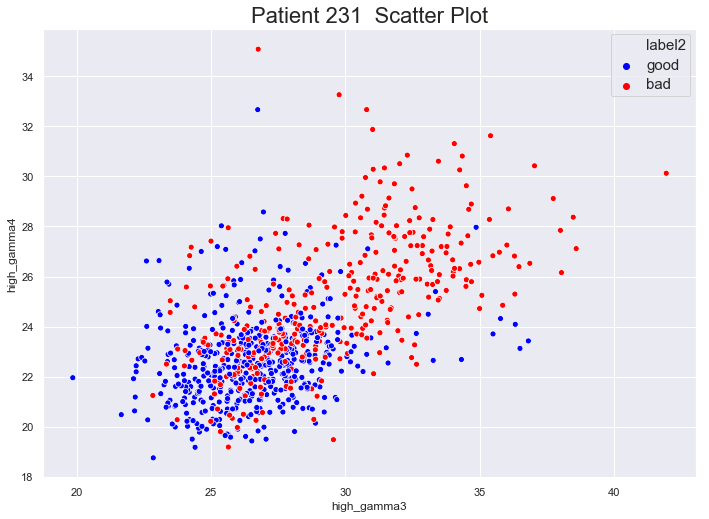

Total outliers removed: 19


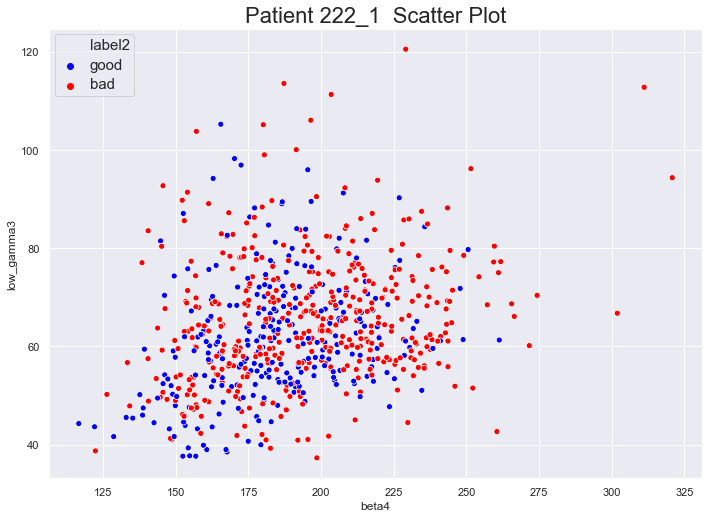

Total outliers removed: 9


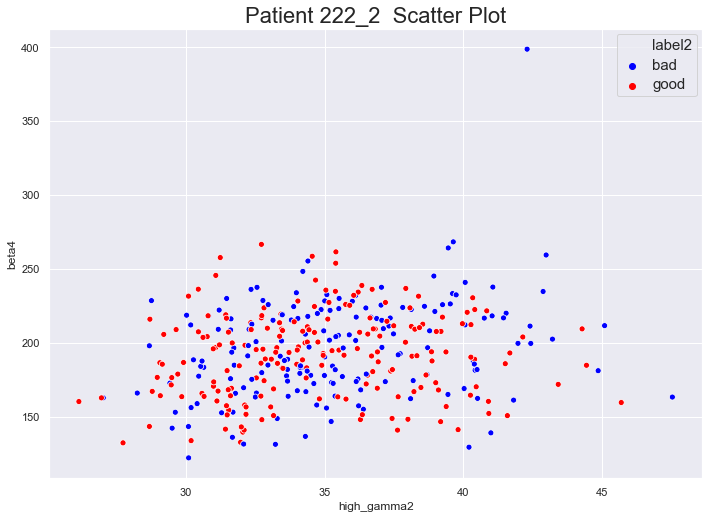

Total outliers removed: 42


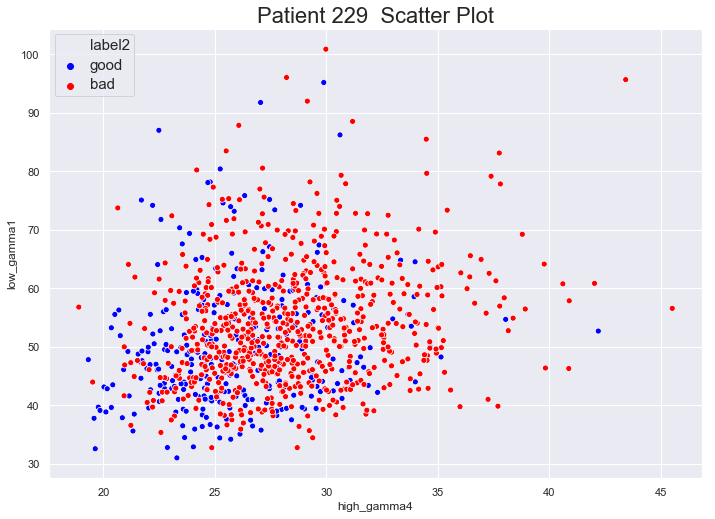

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
for pat in pats:
    data_s = plot_funcs.get_scatter_plot_data(pat)
    data_s.loc[data_s['label'] == True, 'label2'] = 'good'
    data_s.loc[data_s['label'] == False, 'label2'] = 'bad'
    sns.set(font_scale=2)
    colors = ["bright red", "sky"]
    #sns.pairplot(data_ml, hue="label_sti", size = 5, vars=JJ.get_variable_name(features_list), plot_kws={"s": 5},palette=sns.diverging_palette(240, 10, n=4))
    #g = sns.pairplot(data_s, hue="label", size = 8, vars=pat.features_list, plot_kws={"s": 30},palette=sns.xkcd_palette(colors))
    features = pat.features_list
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    g = sns.scatterplot(x = features[0], y = features[1], hue = 'label2', data = data_s,legend = 'brief',palette=['blue','red'])
    #plt.tight_layout(pad=5.2, w_pad=0.2, h_pad=0.5)
    plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    plt.title('Patient {0}  Scatter Plot'.format(pat.id), fontsize=hp.label_fontsize)
    #plt.legend(['bad','good'])
    plt.savefig('../fig/'+ pat.id + '/scatter.png')
    plt.show()

### 3D scatter plot

In [ ]:
%matplotlib notebook

JJ.scatter_plot_3d(data,patid, var_list = plot_3d_var_list)
